# <font color=BLUE size=10> 9ª Competição FLAI de 
# <font color=BLUE size=12> MACHINE LEARNING

***
**Author**: [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)

Este notebook é relativo à Competição de Machine Learning da Flai -

## <b>Etapas do projeto: </b>

### 1. Definição do problema
### 2. Importação dos dados
### 3. Entendimento dos dados
### 4. Limpeza dos dados
### 5. Análise exploratória
### 6. Pré-processamento
### 7. Algoritmo e criação do modelo
### 8. Interpretação dos resultados e avaliação dos modelos


## <font color=green> <b> 1. Definição do problema </b>

#### <b> Objetivo: </b>

* Prever a demanda de aluguéis de bicicleta a partir de variáveis de clima e dia, obtendo o menor valor de RMSE
    


## <font color=green> <b> 2. Importação dos dados </b>

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# ANOVA
!pip install statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

# Machine Learning library
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

!pip install lightgbm
from lightgbm.sklearn import LGBMRegressor
!pip install xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import cross_validate, RepeatedKFold, KFold, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler # used when there are many outliers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

!pip install category_encoders
import category_encoders as ce   

from sklearn.impute import SimpleImputer, KNNImputer      
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

#metrics
from sklearn.metrics import mean_absolute_error , r2_score, mean_squared_error

import warnings
from datetime import datetime

In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
-                                  8kaging
-.ckaging                          20.9
-0ckaging                          20.9
-1ckaging                          20.9
-2ckaging                          20.9
-3ckaging                          20.9
-4ckaging                          20.9
-5ckaging                          20.9
-6ckaging                          20.9
-7ckaging                          20.9
-8ckaging                          20.9
-9ckaging                          20.9
-ackaging                          20.9
-arkupsafe                         1.1.1
-cikit-learn                       0.24.1
-ckaging                           20.9
alabaster                          0.7.12
alembic                            1.7.7
altair                             4.2.0
anaconda-client                    1.7.2
anaconda-navigator                 2.1.4
anaconda-project                   0.9.1
anyio    

pep8                               1.7.1
pexpect                            4.8.0
phik                               0.12.1
pickleshare                        0.7.5
Pillow                             8.2.0
pip                                21.0.1
pkginfo                            1.7.0
plac                               1.1.3
plotly                             5.6.0
pluggy                             0.13.1
ply                                3.11
powerbiclient                      1.0.0
preshed                            3.0.6
prettytable                        3.2.0
prometheus-client                  0.10.1
prometheus-flask-exporter          0.19.0
prompt-toolkit                     3.0.17
protobuf                           3.19.4
psutil                             5.8.0
ptyprocess                         0.7.0
py                                 1.10.0
pyarrow                            7.0.0
PyAutoGUI                          0.9.53
pycaret                            2.3.8
pycodest

In [4]:
train_url = 'https://raw.githubusercontent.com/camilamaestrelli/Demand-Forecasting-Regression_Competition/main/treino.csv'
test_url = 'https://raw.githubusercontent.com/camilamaestrelli/Demand-Forecasting-Regression_Competition/main/teste.csv'

treino = pd.read_csv(train_url)
teste = pd.read_csv(test_url)

display(treino.head())
treino.shape

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis
0,16,sábado,não,verão,39.4,0.0,61.1,2.19,92.0%,3.49,1318
1,21,sexta,não,primavera,22.2,0.0,63.3,0.00,32.0%,2.89,686
2,16,segunda,não,verão,40.5,0.0,52.8,2.51,93.0%,3.97,831
3,7,segunda,sim,outono,25.6,0.0,70.9,0.00,97.0%,1.09,15
4,9,segunda,não,verão,39.9,0.0,58.1,1.69,62.0%,1.09,865


(4500, 11)

In [5]:
treino['visibilidade'] = treino['visibilidade'].apply(lambda x: x.split('%')[0])
treino['visibilidade'] = pd.to_numeric(treino['visibilidade'])
treino.visibilidade = treino.visibilidade / 100

teste['visibilidade'] = teste['visibilidade'].apply(lambda x: x.split('%')[0])
teste['visibilidade'] = pd.to_numeric(teste['visibilidade'])
teste.visibilidade = teste.visibilidade / 100

In [6]:
treino.feriado = treino.feriado.map({'sim': 1, 'não': 0})
teste.feriado = teste.feriado.map({'sim': 1, 'não': 0})

In [7]:
treino['dia_num'] = treino.dia.map({'domingo': 1,
                                   'segunda': 2,
                                   'terça': 3,
                                   'quarta': 4,
                                   'quinta': 5,
                                   'sexta': 6, 
                                   'sábado': 7})
teste['dia_num'] = teste.dia.map({'domingo': 1,
                                   'segunda': 2,
                                   'terça': 3,
                                   'quarta': 4,
                                   'quinta': 5,
                                   'sexta': 6, 
                                   'sábado': 7})

In [8]:
treino

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num
0,16,sábado,0,verão,39.4,0.0,61.1,2.19,0.92,3.49,1318,7
1,21,sexta,0,primavera,22.2,0.0,63.3,0.00,0.32,2.89,686,6
2,16,segunda,0,verão,40.5,0.0,52.8,2.51,0.93,3.97,831,2
3,7,segunda,1,outono,25.6,0.0,70.9,0.00,0.97,1.09,15,2
4,9,segunda,0,verão,39.9,0.0,58.1,1.69,0.62,1.09,865,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6,sexta,0,verão,30.4,0.0,84.5,0.03,0.13,1.57,723,6
4496,16,quarta,0,outono,28.5,0.0,48.3,0.87,0.67,3.49,1151,4
4497,15,sexta,0,primavera,35.1,0.0,37.0,2.20,0.95,3.49,1321,6
4498,18,domingo,0,outono,32.7,0.0,85.2,0.18,0.17,3.85,533,1


In [9]:
np.sqrt(treino.eval('''
    teste = temperatura * visibilidade * sol * vento * hora / umidade
    teste_final = (teste - aluguéis) ** 2
''')['teste_final'].mean())

960.2251272166366

## <font color=green> <b> 6. Pré-processamento </b>

### Funções para as transformações

* Criar coluna `dia útil`

In [10]:
def aux_dia_util(x):
    if (x['feriado'] == 1) or (x['dia'] == 'domingo' or x['dia'] == 'sábado'):
        return 0
    else:
        return 1
    
def dados_dia_util(df):
    df['dia_util'] = df[['feriado', 'dia']].apply(aux_dia_util, axis = 1)   
    return df

treino['dia_util'] = treino[['feriado', 'dia']].apply(aux_dia_util, axis = 1)   
teste['dia_util'] = teste[['feriado', 'dia']].apply(aux_dia_util, axis = 1)



In [11]:
treino

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util
0,16,sábado,0,verão,39.4,0.0,61.1,2.19,0.92,3.49,1318,7,0
1,21,sexta,0,primavera,22.2,0.0,63.3,0.00,0.32,2.89,686,6,1
2,16,segunda,0,verão,40.5,0.0,52.8,2.51,0.93,3.97,831,2,1
3,7,segunda,1,outono,25.6,0.0,70.9,0.00,0.97,1.09,15,2,0
4,9,segunda,0,verão,39.9,0.0,58.1,1.69,0.62,1.09,865,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6,sexta,0,verão,30.4,0.0,84.5,0.03,0.13,1.57,723,6,1
4496,16,quarta,0,outono,28.5,0.0,48.3,0.87,0.67,3.49,1151,4,1
4497,15,sexta,0,primavera,35.1,0.0,37.0,2.20,0.95,3.49,1321,6,1
4498,18,domingo,0,outono,32.7,0.0,85.2,0.18,0.17,3.85,533,1,0


* criar coluna `horas_pico`

In [12]:
def aux_horas_pico_manha(x):
    if x >= 7 and x <= 9:
        return 1
    else:
        return 0
    
def dados_horas_pico_manha(df):
    df['horas_pico_manha'] = df.hora.map(aux_horas_pico_manha)
    return df
    
treino['horas_pico_manha'] = treino.hora.map(aux_horas_pico_manha)
teste['horas_pico_manha'] = teste.hora.map(aux_horas_pico_manha)


def aux_horas_pico_tarde(x):
    if x >=17 and x <= 19:
        return 1
    else:
        return 0

def dados_horas_pico_tarde(df):
    df['horas_pico_tarde'] = df.hora.map(aux_horas_pico_tarde)
    return df

treino['horas_pico_tarde'] = treino.hora.map(aux_horas_pico_tarde)
teste['horas_pico_tarde'] = teste.hora.map(aux_horas_pico_tarde)

In [13]:
def aux_picos_dia_util(x):
    if x.dia_util == 1 and (x.hora == 8 or x.hora == 18):
        return 1

    else:
        return 0
    
def dados_picos_dia_util(x):
    df['picos_dia_util'] = df[['dia_util', 'hora']].apply(aux_picos_dia_util)
    

In [14]:
def aux_horas_picos(x):
    if x == 18 or x == 8:
        return 1
    else:
        return 0

def dados_horas_picos(df):
    df['horas_picos'] = df.hora.map(aux_horas_picos)
    return df



In [15]:
def aux_horas_vale(x):
    if x >= 1 and x <= 6:
        return 1
    else:
        return 0

def dados_horas_vale(df):
    df['horas_vale'] = df.hora.map(aux_horas_vale)
    return df


* criar coluna `periodo_dia`

In [16]:
def aux_periodo_dia(x):
    if x < 6:
        return 'madrugada'
    elif x < 12:
        return 'manha'
    elif x < 18:
        return 'tarde'
    else:
        return 'noite'

def dados_periodo_dia(df):
    df['periodo_dia'] = df.hora.map(aux_periodo_dia)
    return df    


treino['periodo_dia'] = treino.hora.map(aux_periodo_dia)
teste['periodo_dia'] = teste.hora.map(aux_periodo_dia)

In [17]:
treino

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia
0,16,sábado,0,verão,39.4,0.0,61.1,2.19,0.92,3.49,1318,7,0,0,0,tarde
1,21,sexta,0,primavera,22.2,0.0,63.3,0.00,0.32,2.89,686,6,1,0,0,noite
2,16,segunda,0,verão,40.5,0.0,52.8,2.51,0.93,3.97,831,2,1,0,0,tarde
3,7,segunda,1,outono,25.6,0.0,70.9,0.00,0.97,1.09,15,2,0,1,0,manha
4,9,segunda,0,verão,39.9,0.0,58.1,1.69,0.62,1.09,865,2,1,1,0,manha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6,sexta,0,verão,30.4,0.0,84.5,0.03,0.13,1.57,723,6,1,0,0,manha
4496,16,quarta,0,outono,28.5,0.0,48.3,0.87,0.67,3.49,1151,4,1,0,0,tarde
4497,15,sexta,0,primavera,35.1,0.0,37.0,2.20,0.95,3.49,1321,6,1,0,0,tarde
4498,18,domingo,0,outono,32.7,0.0,85.2,0.18,0.17,3.85,533,1,0,0,1,noite


In [18]:
def aux_chuva_binario(df):
    df['chuva'] = df['chuva'].map(lambda x: (0, 1)[x > 0])
    return df

func_chuva_bin = FunctionTransformer(aux_chuva_binario, check_inverse=False)

In [19]:
def aux_sol_binario(df):
    df['sol'] = df['sol'].map(lambda x: (0, 1)[x > 0])
    return df

func_sol_bin = FunctionTransformer(aux_sol_binario, check_inverse=False)

In [20]:
# Funções para transformação

def aux_no_change(df):
    return df

def aux_inverso(df):
    coluna = df.columns[0]
    
    df[coluna] = 1 / df[coluna]
    df.fillna(0, inplace=True)
    return df

def aux_raiz(df):
    coluna = df.columns[0]
    df[coluna] = np.sqrt(df[coluna])
    df.fillna(0, inplace=True)
    return df

def aux_inverso_raiz(df):
    coluna = df.columns[0]
    df[coluna] = 1 / np.sqrt(df[coluna])
    df.fillna(0, inplace=True)
    return df


    

In [21]:

# Numerical transformations
max_abs = MaxAbsScaler()
sc = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()
norma = Normalizer()
quanti_uni = QuantileTransformer(output_distribution='uniform')
quanti_norm = QuantileTransformer(output_distribution='normal')
p_trans = PowerTransformer(method = 'box-cox')
log1 = FunctionTransformer(np.log1p)
log = FunctionTransformer(np.log) 
poly = PolynomialFeatures(degree=2, interaction_only = False,
                         # include_bias = False
                         )

# Categorical encoders
bi_encoder = ce.BinaryEncoder()
target_encoder = ce.TargetEncoder()
out_encoder = ce.LeaveOneOutEncoder() 
one_hot = OneHotEncoder(drop = 'first')
median_encoder = ce.quantile_encoder.QuantileEncoder()

# My transformation functions
no_change = FunctionTransformer(aux_no_change)

func_inverso = FunctionTransformer(aux_inverso)

func_raiz = FunctionTransformer(aux_raiz)

func_inverso_raiz = FunctionTransformer(aux_inverso_raiz)



C:\Users\camil\AppData\Roaming\Python\Python38\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\camil\AppData\Roaming\Python\Python38\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [22]:
colunas_numericas = list(treino.select_dtypes(include='float').columns.values)
colunas_numericas

['temperatura', 'chuva', 'umidade', 'sol', 'visibilidade', 'vento']

# Definindo o pipeline

In [23]:
# criando colunas com valores inversos (1/x)
# Só vale para variáveis numéricas

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

# criando colunas com valores da raiz
preprocessor_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

# criando colunas com valores inversos da raiz
preprocessor_valores_inversos_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

# criando colunas com valores em log
preprocessor_log = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', log1, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

# 

variaveis_cat = ['estação', 'periodo_dia', 'dia']

preprocessor_dummy = ColumnTransformer([
    ('cats', one_hot, variaveis_cat)
    ],
    remainder = sc)

# Unindo as colunas criadas com as atuais

from sklearn.pipeline import FeatureUnion

uniao = FeatureUnion([('ct1', preprocessor_dummy), 
                      ('ct2', preprocessor_raiz),
                      ('ct3', preprocessor_valores_inversos_raiz),
                      ('ct4', preprocessor_valores_inversos)])

### Funções úteis

In [24]:
def rmse_eval(df, modelo, kf = KFold(n_splits = 15, random_state = 1986)):

    X = df.drop(columns = ['aluguéis'], axis = 1)
    y = df['aluguéis']

    scTreino = [] 
    scTeste = [] 

    df_treino = df.copy()

    for i_treino,i_teste in kf.split(X): 
        X_treino, y_treino = X.iloc[i_treino],y.iloc[i_treino] 
        X_teste, y_teste = X.iloc[i_teste],y.iloc[i_teste] 
        pipe_final.fit(X_treino,y_treino) 
        y_predTreino = pipe_final.predict(X_treino) 
        y_predTeste = pipe_final.predict(X_teste) 
        df_treino.loc[i_teste,'preditos'] = y_predTeste
        scTreino.append(np.sqrt(mean_squared_error(y_treino,y_predTreino))) 
        scTeste.append(np.sqrt(mean_squared_error(y_teste,y_predTeste))) 

    print("RSME treino e: {:.2f}, std: {:.2f}".format(np.mean(scTreino), np.std(scTreino))) 
    print("RSME teste  e: {:.2f}, std: {:.2f}".format(np.mean(scTeste), np.std(scTeste))) 
    
    df_treino['dif'] = df_treino['aluguéis'] - df_treino.preditos
    df_treino['abs_dif'] = abs(df_treino['aluguéis'] - df_treino.preditos)
    df_treino['erro_quadra'] = df_treino['abs_dif'].pow(2)
    
    return df_treino

def erro_groupby(df, coluna):
    
    df_analise = df.copy()
    
    df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()
    df_analise['erro_quadra'] = np.sqrt(df_analise['erro_quadra'])
    
    return df_analise

C:\Users\camil\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# Modelos usados na Submissão

### <font color = red> Nota: 
    * Os modelos apresentaram um overfit considerável. Entretanto, os RMSE de teste apresentaram melhor valor nesses modelos do que naqueles com menor overfit. Dessa forma, com o objetivo de contornar esse problema foram escolhidos 17 modelos com diferentes variáveis.

# Modelo 1: Todas as variáveis (sc, inversos, raiz e raiz dos inversos) + chuva_bin

In [25]:
# lbm + colunas inverso

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, ['temperatura', #'chuva', 
                                       'umidade', #'sol', 
                                       'visibilidade', 'vento'
                                      ]),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva'])
    ],
    remainder = sc)

preprocessor_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', #'chuva', 
                                    'umidade', 'sol', 
                                    'visibilidade', 'vento'
                                   ]),
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_valores_inversos_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', #'chuva', 
                                            'umidade', #'sol', 
                                            'visibilidade', 'vento'
                                           ]),
    ],
    remainder='drop')), ('transform', sc)])


uniao = FeatureUnion([('ct1', preprocessor_dummy), 
                      ('ct2', preprocessor_raiz),
                      ('ct3', preprocessor_valores_inversos_raiz),
                      ('ct4', preprocessor_valores_inversos)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.147011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                         # include_bias = False
                         )), ('selection', SelectFromModel(LGBMRegressor(random_state=1986)))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_poly1 = rmse_eval(treino, pipe_final)



RSME treino e: 29.90, std: 0.40
RSME teste  e: 258.62, std: 28.03


In [26]:
erro_groupby(df_treino_pipe_poly1, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,76.770179,51.764669
outono,365.376077,223.058790
primavera,235.997018,147.882225
verão,268.592993,169.043370


In [27]:
np.sqrt(df_treino_pipe_poly1['erro_quadra'].mean())

260.13690823377993

In [28]:
np.sqrt(df_treino_pipe_poly1.loc[df_treino_pipe_poly1['estação'] != 'inverno'].erro_quadra.mean())

294.4211800196949

In [29]:
erro_groupby(df_treino_pipe_poly1, 'dia')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,329.918941,197.470843
quarta,234.818309,136.421273
quinta,225.324072,131.794263
segunda,229.634194,134.736352
sexta,268.098162,156.014131
sábado,237.684931,133.955401
terça,278.508880,155.724732


In [30]:
erro_groupby(df_treino_pipe_poly1, 'hora')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,155.345304,100.771766
1,128.624331,92.043522
2,99.742912,68.841419
3,75.753553,51.116925
4,59.638150,41.066090
5,56.429636,40.838144
6,121.035959,86.632844
7,293.402711,201.105853
8,505.617018,370.494049


# Modelo 2: Todas as variáveis (sc, inversos, raiz e raiz dos inversos)

In [31]:

from sklearn.pipeline import FeatureUnion

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, ['temperatura', 'umidade', 'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_valores_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', 'chuva', 'umidade', #'sol', 
                                    'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_valores_raiz_inverso = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', 'umidade', 'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

variaveis_cat = ['estação', 'periodo_dia', 'dia']

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    ('sol', func_sol_bin, ['sol'])
    
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), 
                      ('ct12', preprocessor_valores_raiz),
                      ('ct13', preprocessor_valores_raiz_inverso),
                      ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.647011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_raiz = rmse_eval(treino, pipe_final)



RSME treino e: 42.99, std: 0.30
RSME teste  e: 257.53, std: 25.06


In [32]:
df_treino_pipe_raiz.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,abs_dif,erro_quadra
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.709612,-0.540056,150.688349,6.695059e+04
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,592.898292,258.776311,210.365029,2.377529e+05
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-99.467156,-2258.088967,0.018612,3.463918e-04
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.456385,-69.872384,30.805489,9.489784e+02
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,578.782244,-1.347238,74.840424,5.601089e+03
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1070.886985,83.517426,181.387309,3.290136e+04
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3020.929177,1486.857877,2258.088967,5.098966e+06


In [33]:
np.sqrt(df_treino_pipe_raiz['erro_quadra'].mean())

258.74812018890225

In [34]:
np.sqrt(df_treino_pipe_raiz.loc[df_treino_pipe_raiz['estação'] != 'inverno'].erro_quadra.mean())

292.47652116202175

In [35]:
erro_groupby(df_treino_pipe_raiz, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.870255,54.151778
outono,357.750990,221.714910
primavera,233.376811,147.382193
verão,274.532128,173.281272


In [36]:
erro_groupby(df_treino_pipe_raiz, 'dia')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,328.759617,198.430478
quarta,245.049224,143.199304
quinta,240.917723,140.186925
segunda,216.979631,130.404035
sexta,258.995510,154.506328
sábado,227.853301,134.983810
terça,275.013441,152.570985


In [37]:
erro_groupby(df_treino_pipe_raiz, 'hora')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,157.483518,101.989928
1,130.038528,93.678404
2,102.271754,72.604539
3,84.961826,55.491840
4,61.542184,41.875496
5,61.567077,43.185478
6,136.522189,94.048044
7,304.325339,210.438324
8,506.684054,375.448904


# Modelo 3: versão com menos variáveis, sem sol

In [38]:

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())




df_treino_dummy = rmse_eval(treino.drop(columns = ['sol'], axis = 1), pipe_final)



RSME treino e: 22.67, std: 0.21
RSME teste  e: 255.53, std: 24.36


In [39]:
erro_groupby(df_treino_dummy, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.526839,53.581763
outono,359.418276,218.045626
primavera,235.603635,146.498133
verão,262.781617,164.465753


In [40]:
np.sqrt(df_treino_dummy.erro_quadra.mean())

256.69119561690724

In [41]:
np.sqrt(df_treino_dummy.loc[df_treino_dummy['estação'] != 'inverno'].erro_quadra.mean())

290.1259399499222

# Modelo 4:  versão com menos variáveis e chuva dummy, sem sol

In [42]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_dummy_chuva = rmse_eval(treino.drop(columns = ['sol'], axis = 1), pipe_final)



RSME treino e: 23.40, std: 0.31
RSME teste  e: 256.48, std: 23.91


In [43]:
erro_groupby(df_treino_dummy_chuva, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,78.314996,52.642468
outono,355.722019,220.249756
primavera,240.972529,152.087524
verão,266.810479,167.544450


In [44]:
np.sqrt(df_treino_dummy_chuva.erro_quadra.mean())

257.5899926069083

In [45]:
np.sqrt(df_treino_dummy_chuva.loc[df_treino_dummy_chuva['estação'] != 'inverno'].erro_quadra.mean())

291.35146897517615

# Modelo 5: sc + inversos das raizes, sem vento

In [46]:

colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]
preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_pipe_rmelhor_raiz_inverso = rmse_eval(treino.drop(columns = ['vento'], axis = 1), pipe_final)




RSME treino e: 36.64, std: 0.47
RSME teste  e: 256.23, std: 29.60


In [47]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,82.916055,53.987584
outono,358.544977,219.294661
primavera,235.812891,150.209604
verão,267.767347,167.081138


In [48]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso, 'dia')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,332.600811,199.850064
quarta,237.602610,139.161973
quinta,236.698289,135.987882
segunda,217.065097,128.300910
sexta,248.789772,147.861944
sábado,232.842071,137.037573
terça,280.768524,155.871040


In [49]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso, 'hora')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,160.391976,100.555399
1,123.894860,90.215976
2,104.796507,74.369359
3,79.605652,51.817214
4,57.607973,38.598675
5,60.248717,43.428226
6,133.197040,92.961009
7,277.364980,188.549030
8,519.796191,386.182109


In [50]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso.erro_quadra.mean())

257.92998525535313

In [51]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso.loc[df_treino_pipe_rmelhor_raiz_inverso['estação'] != 'inverno'].erro_quadra.mean())

291.35302838062915

# Modelo 6: inversos da raiz + sc + chuva binário e sem Sol e vento

In [52]:

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)


preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', #'chuva', 
                                            'umidade', 
                                            #'sol', 
                                            'visibilidade',
                                            #'vento'
                                           ]),
    ],
    remainder='drop')), 
                                                  ('transform', sc)
                                                 ])


uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.076788993498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_pipe_rmelhor_raiz_inverso_sem_visib = rmse_eval(treino.drop(columns = ['vento', 'sol'], axis = 1), pipe_final)




RSME treino e: 35.23, std: 0.43
RSME teste  e: 257.24, std: 26.54


In [53]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_sem_visib, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.820913,53.032613
outono,356.225676,220.296617
primavera,242.744351,152.730287
verão,267.675663,166.784557


In [54]:

np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_sem_visib.erro_quadra.mean())

258.6038440721552

In [55]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_sem_visib.loc[df_treino_pipe_rmelhor_raiz_inverso_sem_visib['estação'] != 'inverno'].erro_quadra.mean())

292.3137999229741

# Modelo 7: 3/5 : sc + inversos da raiz , sem Sol e vento

In [56]:

colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), 
                                                  ('transform', sc)
                                                 ])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.06788993498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_pipe_rmelhor_raiz_inverso_sem_sol = rmse_eval(treino.drop(columns = ['vento', 'sol'], axis = 1), pipe_final)



RSME treino e: 40.20, std: 0.54
RSME teste  e: 257.44, std: 24.96


In [57]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_sem_sol, 'estação')


<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,86.098540,54.640638
outono,358.708342,222.331840
primavera,236.990405,148.270436
verão,268.295676,166.483242


In [58]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_sem_sol, 'dia')


<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,336.111423,200.422440
quarta,242.394380,139.571411
quinta,250.699267,140.125934
segunda,216.279065,127.658054
sexta,250.967619,151.090370
sábado,221.460987,133.423076
terça,271.885676,153.246483


In [59]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_sem_sol, 'hora')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,167.047962,101.942999
1,128.426475,92.152923
2,101.459472,72.110554
3,81.482269,53.525863
4,61.145869,41.816598
5,56.575550,40.208494
6,124.572724,90.991319
7,287.485693,201.745941
8,525.148615,388.559130


In [60]:

np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_sem_sol.erro_quadra.mean())

258.65047797400126

In [61]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_sem_sol.loc[df_treino_pipe_rmelhor_raiz_inverso_sem_sol['estação'] != 'inverno'].erro_quadra.mean())

291.90372680806973

# Modelo 8: sc + raiz, sem sol, vento, periodo_dia e horas pico tarde

In [62]:

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', #'chuva', 
                                    'umidade', #'sol', 
                                    'visibilidade', #'vento'
                                   ]),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])


SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_pipe_rmelhor_raiz = rmse_eval(treino.drop(columns = ['sol', 'vento', 'horas_pico_tarde', 'periodo_dia'], axis = 1), pipe_final)



RSME treino e: 39.71, std: 0.53
RSME teste  e: 252.55, std: 23.80


In [63]:
erro_groupby(df_treino_pipe_rmelhor_raiz, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,77.652152,51.808383
outono,350.239998,217.639365
primavera,236.643053,153.063960
verão,263.284115,168.665783


In [64]:
np.sqrt(df_treino_pipe_rmelhor_raiz.erro_quadra.mean())

253.66617735082139

In [65]:
np.sqrt(df_treino_pipe_rmelhor_raiz.loc[df_treino_pipe_rmelhor_raiz['estação'] != 'inverno'].erro_quadra.mean())

286.86936422686824

***

# Modelo 9: sc + inverso, sem periodo_dia, horas_pico_tarde, horas_pico_manha

In [66]:
# lbm

from sklearn.pipeline import FeatureUnion

colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos_ = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, colunas_numericas),

    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos_), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma


preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_pipe_poly_melhor = rmse_eval(treino.drop(columns = ['sol', 'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis = 1), pipe_final)





RSME treino e: 32.65, std: 0.38
RSME teste  e: 253.06, std: 24.51


In [67]:
df_treino_pipe_poly_melhor.describe()

,hora,feriado,temperatura,chuva,umidade,visibilidade,vento,aluguéis,dia_num,dia_util,preditos,dif,abs_dif,erro_quadra
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.696940,2.322933,727.169556,3.972444,0.689333,726.917877,0.251679,148.804920,6.464011e+04
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.296047,1.243427,646.886075,1.976669,0.462818,594.263368,254.272327,206.171418,2.267411e+05
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.020000,0.250000,5.000000,1.000000,0.000000,-160.007683,-1979.738712,0.006137,3.766727e-05
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.450000,1.330000,208.750000,2.000000,0.000000,244.381679,-72.223407,30.787554,9.478736e+02
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.830000,2.050000,534.500000,4.000000,1.000000,571.917929,-1.226456,76.606418,5.868546e+03
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.970000,3.010000,1096.000000,6.000000,1.000000,1053.635964,81.739796,177.043834,3.134452e+04
max,23.000000,1.000000,44.600000,27.650000,92.000000,0.970000,9.130000,3566.000000,7.000000,1.000000,3004.628503,1494.444462,1979.738712,3.919365e+06


In [68]:
erro_groupby(df_treino_pipe_poly_melhor, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,78.140243,53.270790
outono,354.518867,218.220219
primavera,233.472582,150.331193
verão,262.580897,167.178248


In [69]:
erro_groupby(df_treino_pipe_poly_melhor, 'dia')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,325.638218,197.256711
quarta,235.962446,138.095611
quinta,235.708559,136.236367
segunda,213.178132,128.698220
sexta,251.886254,152.723412
sábado,235.610423,138.635805
terça,265.729140,149.998177


In [70]:
erro_groupby(df_treino_pipe_poly_melhor, 'hora')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,156.772481,104.635390
1,138.795812,103.979578
2,99.997630,70.098120
3,81.819993,54.309635
4,64.862671,44.974707
5,61.844367,47.143250
6,124.313294,83.251842
7,295.576984,215.210398
8,525.542995,388.312003


In [71]:
np.sqrt(df_treino_pipe_poly_melhor.erro_quadra.mean())

254.24419758657123

In [72]:
np.sqrt(df_treino_pipe_poly_melhor.loc[df_treino_pipe_poly_melhor['estação'] != 'inverno'].erro_quadra.mean())

287.49706975256134

# Modelo 10: 6: inversos +sc + horas_picos, sem vento, periodo_dia, hora pico manha e hora pico tarde

In [74]:
SEED = 1986
np.random.seed(SEED)

colunas_numericas = ['temperatura', 'chuva', 
                     'umidade', 'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos_2nd =Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos_2nd), ('ct2', preprocessor_dummy)])

best_params = {'reg_alpha': 0.47011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.09393498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001
                           ) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())

df_treino_pipe_poly_2melhor = treino.copy()
df_treino_pipe_poly_2melhor = dados_horas_picos(df_treino_pipe_poly_2melhor)
df_treino_pipe_poly_2melhor = df_treino_pipe_poly_2melhor.drop(columns = ['vento', 'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis = 1)
df_treino_pipe_poly_2melhor = rmse_eval(df_treino_pipe_poly_2melhor, pipe_final)



RSME treino e: 32.07, std: 0.31
RSME teste  e: 251.30, std: 29.16


In [75]:

df_treino_pipe_poly_2melhor.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,aluguéis,dia_num,dia_util,horas_picos,preditos,dif,abs_dif,erro_quadra
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,727.169556,3.972444,0.689333,0.083333,727.677502,-0.507946,146.485580,6.400265e+04
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,646.886075,1.976669,0.462818,0.276416,594.635548,253.015061,206.286413,2.402053e+05
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,5.000000,1.000000,0.000000,0.000000,-60.269272,-2294.985208,0.001882,3.540954e-06
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,208.750000,2.000000,0.000000,0.000000,242.259956,-69.194347,29.436667,8.665191e+02
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,534.500000,4.000000,1.000000,0.000000,566.052629,0.632236,74.479927,5.547260e+03
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,1096.000000,6.000000,1.000000,0.000000,1064.673757,80.428106,176.107898,3.101401e+04
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,3566.000000,7.000000,1.000000,1.000000,3184.446878,1561.336128,2294.985208,5.266957e+06


In [76]:
np.sqrt(df_treino_pipe_poly_2melhor['erro_quadra'].mean())


252.98745657383625

In [77]:
np.sqrt(df_treino_pipe_poly_2melhor.loc[df_treino_pipe_poly_2melhor['estação'] != 'inverno'].erro_quadra.mean())

285.38683038497754

In [78]:
erro_groupby(df_treino_pipe_poly_2melhor, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,85.587907,54.749105
outono,353.937193,214.699449
primavera,228.459486,146.541776
verão,260.915046,164.026030


In [79]:
erro_groupby(df_treino_pipe_poly_2melhor, 'dia')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,324.532963,195.855076
quarta,224.850261,132.790781
quinta,227.827405,133.438147
segunda,216.691297,124.639057
sexta,254.613961,153.470852
sábado,230.977664,133.078272
terça,273.387173,151.766016


# Modelo 11: **em outro** [notebook](https://github.com/camilamaestrelli/Demand-Forecasting-Regression_Competition/blob/main/9th_Competition_Alhorithm-Model%2311.ipynb)


* Este foi o modelo com menor overfit com 
    - RSME treino: 96.04, std: 0.65 
    - RSME teste: 258.39, std: 29.46

In [80]:
df_treino_one = pd.read_csv('df_treino_one_grid.csv')
df_treino_one

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_util,preditos
0,16,7,0,4,39.4,0.0,61.1,2.19,0.92,3.49,1318,0,1173.457155
1,21,6,0,2,22.2,0.0,63.3,0.00,0.32,2.89,686,1,599.705361
2,16,2,0,4,40.5,0.0,52.8,2.51,0.93,3.97,831,1,1003.956132
3,7,2,1,3,25.6,0.0,70.9,0.00,0.97,1.09,15,0,153.647722
4,9,2,0,4,39.9,0.0,58.1,1.69,0.62,1.09,865,1,997.553325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6,6,0,4,30.4,0.0,84.5,0.03,0.13,1.57,723,1,575.560821
4496,16,4,0,3,28.5,0.0,48.3,0.87,0.67,3.49,1151,1,1233.086555
4497,15,6,0,2,35.1,0.0,37.0,2.20,0.95,3.49,1321,1,1476.238909
4498,18,1,0,3,32.7,0.0,85.2,0.18,0.17,3.85,533,0,948.611031


In [81]:
df_voting = df_treino_pipe_poly1.copy() # 260,14 / 294,42
df_voting['preditos2'] = df_treino_pipe_raiz.preditos # 258,75 / 292,48

df_voting['preditos3'] = df_treino_dummy.preditos # 256,69 / 290,13
df_voting['preditos4'] = df_treino_dummy_chuva.preditos # 257,59 / 291,35

df_voting['preditos5'] = df_treino_pipe_rmelhor_raiz_inverso.preditos # 257,93 / 291,35

df_voting['preditos6'] = df_treino_pipe_rmelhor_raiz_inverso_sem_visib.preditos # 258,6 / 292,31
df_voting['preditos7'] = df_treino_pipe_rmelhor_raiz_inverso_sem_sol.preditos # 258,65 / 291,9
df_voting['preditos8'] = df_treino_pipe_rmelhor_raiz.preditos # 253,67 / 286,87

df_voting['preditos9'] = df_treino_pipe_poly_melhor.preditos # 253,83 / 287,01
df_voting['preditos10'] = df_treino_pipe_poly_2melhor.preditos # 252,99 / 285,37
# Modelo 11: grid (outro arq)
df_voting['preditos11'] = df_treino_one.preditos # 260,07 / 294,26




# Modelo 12: sem horas picos tarde e periodo_dia

In [82]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_rmelhor_raiz_inverso_out = rmse_eval(treino.drop(columns = ['periodo_dia', 'horas_pico_tarde'], axis = 1), pipe_final)




RSME treino e: 28.45, std: 0.40
RSME teste  e: 253.05, std: 24.27


In [83]:
df_treino_pipe_rmelhor_raiz_inverso_out.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,preditos,dif,abs_dif,erro_quadra
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,726.950562,0.218994,146.881642,6.462426e+04
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,591.544045,254.241173,207.508095,2.375045e+05
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,-133.297112,-2243.313596,0.009839,9.681413e-05
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,244.873550,-70.415906,30.452344,9.273453e+02
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,573.692912,-0.212108,74.818160,5.597757e+03
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,1062.250530,78.768712,176.106319,3.101344e+04
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,3185.185537,1609.510257,2243.313596,5.032456e+06


In [84]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_out, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.097292,52.403936
outono,360.575103,220.638299
primavera,227.439156,144.737370
verão,259.172414,163.739094


In [85]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_out.erro_quadra.mean())

254.2130164714282

In [86]:
np.sqrt(df_treino_pipe_rmelhor_raiz_inverso_out.loc[df_treino_pipe_rmelhor_raiz_inverso_out['estação'] != 'inverno'].erro_quadra.mean())

287.2951880068476

In [87]:
df_voting['preditos12'] = df_treino_pipe_rmelhor_raiz_inverso_out.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,abs_dif,erro_quadra,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,149.507367,6.767121e+04,727.709612,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,212.905687,2.477253e+05,592.898292,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,0.070081,4.911363e-03,-99.467156,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,29.230403,8.544167e+02,243.456385,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,76.149868,5.798802e+03,578.782244,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,176.236942,3.105948e+04,1070.886985,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,2225.784902,4.954118e+06,3020.929177,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537


# Modelo 13: sem horas picos tarde, periodo_dia e vento

In [88]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)
uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_rmelhor_raiz_inverso_out_vento = rmse_eval(treino.drop(columns = ['vento', 'periodo_dia', 'horas_pico_tarde'], axis = 1), pipe_final)




RSME treino e: 33.60, std: 0.29
RSME teste  e: 252.99, std: 27.90


In [89]:
df_voting['preditos13'] = df_treino_pipe_rmelhor_raiz_inverso_out_vento.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,abs_dif,erro_quadra,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,149.507367,6.767121e+04,727.709612,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,212.905687,2.477253e+05,592.898292,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,0.070081,4.911363e-03,-99.467156,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,29.230403,8.544167e+02,243.456385,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,76.149868,5.798802e+03,578.782244,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,176.236942,3.105948e+04,1070.886985,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,2225.784902,4.954118e+06,3020.929177,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764


In [90]:
df_treino_pipe_rmelhor_raiz_inverso_out_vento.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,aluguéis,dia_num,dia_util,horas_pico_manha,preditos,dif,abs_dif,erro_quadra
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,727.169556,3.972444,0.689333,0.123778,727.666735,-0.497180,147.904716,6.478327e+04
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,646.886075,1.976669,0.462818,0.329364,593.918050,254.553377,207.164190,2.328930e+05
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,5.000000,1.000000,0.000000,0.000000,-101.683138,-2404.329585,0.046627,2.174106e-03
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,208.750000,2.000000,0.000000,0.000000,241.316721,-73.134264,28.733547,8.256180e+02
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,534.500000,4.000000,1.000000,0.000000,566.426639,0.225122,76.577036,5.864042e+03
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,1096.000000,6.000000,1.000000,0.000000,1063.388763,81.425337,178.279902,3.178372e+04
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,3566.000000,7.000000,1.000000,1.000000,3315.466764,1601.662913,2404.329585,5.780801e+06


In [91]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_out_vento, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,83.147715,53.456300
outono,356.829840,220.736645
primavera,232.051066,146.209651
verão,260.431859,165.186796


# Modelo 14:  sem horas picos tarde e periodo_dia e vento e chuva_bin

In [92]:
from sklearn.pipeline import FeatureUnion

colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 
                     #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.0788993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_rmelhor_raiz_inverso_outer = rmse_eval(treino.drop(columns = ['vento', 'periodo_dia', 'horas_pico_tarde'], axis = 1), pipe_final)



RSME treino e: 39.98, std: 0.44
RSME teste  e: 254.30, std: 28.79


In [93]:
df_voting['preditos14'] = df_treino_pipe_rmelhor_raiz_inverso_outer.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,abs_dif,erro_quadra,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,149.507367,6.767121e+04,727.709612,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735,727.606120
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,212.905687,2.477253e+05,592.898292,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050,593.290577
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,0.070081,4.911363e-03,-99.467156,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138,-174.722949
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,29.230403,8.544167e+02,243.456385,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721,242.893209
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,76.149868,5.798802e+03,578.782244,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639,567.356742
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,176.236942,3.105948e+04,1070.886985,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763,1063.846622
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,2225.784902,4.954118e+06,3020.929177,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764,3215.641394


In [94]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_outer, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,79.092434,52.596379
outono,356.643160,218.924002
primavera,238.315465,152.130678
verão,261.484092,165.624015


# Modelo 15: sem pico tarde e pico manha

In [95]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
   # ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_rmelhor_raiz_inverso_out_tarde = rmse_eval(treino.drop(columns = ['horas_pico_manha', 'horas_pico_tarde'], axis = 1), pipe_final)



RSME treino e: 28.54, std: 0.26
RSME teste  e: 255.27, std: 27.42


In [96]:
df_voting['preditos15'] = df_treino_pipe_rmelhor_raiz_inverso_out_tarde.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,...,erro_quadra,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,...,6.767121e+04,727.709612,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735,727.606120,725.977372
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,...,2.477253e+05,592.898292,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050,593.290577,590.992981
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,...,4.911363e-03,-99.467156,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138,-174.722949,-99.067835
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,...,8.544167e+02,243.456385,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721,242.893209,242.795989
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,...,5.798802e+03,578.782244,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639,567.356742,572.417052
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,...,3.105948e+04,1070.886985,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763,1063.846622,1065.066552
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,...,4.954118e+06,3020.929177,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764,3215.641394,3174.399035


In [97]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_out_tarde, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.113187,52.783715
outono,364.618649,223.011264
primavera,227.772398,144.134220
verão,263.032648,164.702348


# Modelo 16:  sem horas picos tarde e periodo_dia e dia util

In [98]:

colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_rmelhor_raiz_inverso_out_dia_util = rmse_eval(treino.drop(columns = ['periodo_dia', 'horas_pico_tarde', 'sol'], axis = 1), pipe_final)






RSME treino e: 32.67, std: 0.43
RSME teste  e: 252.83, std: 24.13


In [99]:
df_voting['preditos16'] = df_treino_pipe_rmelhor_raiz_inverso_out_dia_util.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,...,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,...,727.709612,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735,727.606120,725.977372,728.154542
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,...,592.898292,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050,593.290577,590.992981,593.042049
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,...,-99.467156,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138,-174.722949,-99.067835,-133.740291
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,...,243.456385,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721,242.893209,242.795989,244.221403
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,...,578.782244,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639,567.356742,572.417052,570.690506
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,...,1070.886985,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763,1063.846622,1065.066552,1062.688516
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,...,3020.929177,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764,3215.641394,3174.399035,3052.663531


In [100]:
erro_groupby(df_treino_pipe_rmelhor_raiz_inverso_out_dia_util, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,78.038377,52.187129
outono,349.127826,217.174431
primavera,234.838368,151.231818
verão,267.404002,169.729346


# Modelo 17: sc, sem periodo_dia, horas_pico_tarde, horas_pico_manha e vento + chuva_bin

In [101]:

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treino_dummy_chuva_out = rmse_eval(treino.drop(columns = ['periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis = 1), pipe_final)





RSME treino e: 26.07, std: 0.31
RSME teste  e: 248.18, std: 24.21


In [102]:
df_voting['preditos17'] = df_treino_dummy_chuva_out.preditos
df_voting.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,...,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.513011,...,728.546756,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735,727.606120,725.977372,728.154542,727.038812
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,260.165311,...,596.950869,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050,593.290577,590.992981,593.042049,595.023415
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2225.784902,...,-166.702814,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138,-174.722949,-99.067835,-133.740291,-140.614448
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-69.522131,...,243.157418,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721,242.893209,242.795989,244.221403,245.201820
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-0.314028,...,571.343787,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639,567.356742,572.417052,570.690506,568.461952
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,82.670426,...,1065.969831,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763,1063.846622,1065.066552,1062.688516,1059.063285
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1610.765608,...,3122.827529,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764,3215.641394,3174.399035,3052.663531,3274.651605


In [103]:
erro_groupby(df_treino_dummy_chuva_out, 'estação')

<ipython-input-24-05a715c740ec>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analise = df_analise.groupby(coluna)['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,80.360838,53.621622
outono,344.137156,215.417939
primavera,228.821474,145.642911
verão,261.311884,163.854594


In [104]:
def preditos_voting(data, weights = [1,1,1,1,
                                     1,1,1,1,
                                     1,1,1,
                                    1,1,1,
                                    1,1,1]):
    
    data['preditos_voting'] = np.average(data[['preditos', 'preditos2', 'preditos3', 
                                               'preditos4', 'preditos5', 'preditos6', 
                                               'preditos7', 'preditos8', 'preditos9',
                                               'preditos10', 'preditos11','preditos12', 'preditos13',
                                              'preditos14', 'preditos15',
                                              'preditos16',
                                              'preditos17']], axis=1, weights=weights)
    
    data['dif'] = data['aluguéis'] - data.preditos_voting
    data['abs_dif'] = abs(data['aluguéis'] - data.preditos_voting)
    data['erro_quadra'] = data['abs_dif'].pow(2)
    
    print(np.sqrt(data.erro_quadra.mean()))
    print('Exceto inverno: ', np.sqrt(data.loc[data['estação'] != 'inverno'].erro_quadra.mean()))
    
    analise_1 = data.groupby('estação')['erro_quadra', 'abs_dif'].mean()
    analise_1['erro_quadra'] = np.sqrt(analise_1['erro_quadra'])
    display(analise_1)
    
    analise_2 = data.groupby('dia')['erro_quadra', 'abs_dif'].mean()
    analise_2['erro_quadra'] = np.sqrt(analise_2['erro_quadra'])
    display(analise_2)
    
    analise_3 = data.groupby('hora')['erro_quadra', 'abs_dif'].mean()
    analise_3['erro_quadra'] = np.sqrt(analise_3['erro_quadra'])
    display(analise_3)
    
    print(np.sqrt(data.erro_quadra.mean()))
    print('Exceto inverno: ', np.sqrt(data.loc[data['estação'] != 'inverno'].erro_quadra.mean()))
    
    return data

df_mais_modelos = preditos_voting(df_voting, weights = [1,1,1,
                                             1,1,1,
                                             1,1,1,
                                             1,1,1,
                                             1,1,1,1,1])

245.85931717360415
Exceto inverno:  278.12190136917485


<ipython-input-104-5c6cc166fed6>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_1 = data.groupby('estação')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,74.280311,48.862495
outono,345.845881,209.635323
primavera,222.167975,139.317284
verão,253.470784,157.090090


<ipython-input-104-5c6cc166fed6>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_2 = data.groupby('dia')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,319.353107,191.196323
quarta,223.720695,129.343701
quinta,224.607719,129.192348
segunda,206.475974,119.491556
sexta,240.699886,140.982614
sábado,220.628831,125.617530
terça,266.287007,145.066119


<ipython-input-104-5c6cc166fed6>:30: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_3 = data.groupby('hora')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,155.075214,96.846851
1,123.031500,89.491948
2,98.185759,69.144280
3,72.338100,46.677612
4,54.148745,36.807610
5,50.183792,35.526826
6,114.466954,80.518968
7,275.965228,190.219913
8,496.331063,365.192304


245.85931717360415
Exceto inverno:  278.12190136917485


In [105]:
df_voting[['aluguéis', 'preditos', 'preditos2',
                    'preditos3', 
          'preditos4', 'preditos5',
                    'preditos6', 'preditos7',  'preditos8', 
                    'preditos9',
                    'preditos10', 'preditos11',
           'preditos12', 'preditos13',
           'preditos14', 'preditos15',
           'preditos16', 'preditos17',
                    ]].corr()

,aluguéis,preditos,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17
aluguéis,1.000000,0.915565,0.916500,0.917897,0.917290,0.917084,0.916612,0.916584,0.919890,0.919508,0.920337,0.915616,0.919543,0.919323,0.918395,0.917862,0.919688,0.922703
preditos,0.915565,1.000000,0.985445,0.984988,0.985984,0.981946,0.983005,0.982214,0.980415,0.983324,0.982702,0.987337,0.987715,0.984368,0.985804,0.987252,0.983836,0.984733
preditos2,0.916500,0.985445,1.000000,0.988727,0.987271,0.987639,0.984275,0.986576,0.983149,0.986706,0.982321,0.984480,0.986335,0.982259,0.981875,0.985333,0.986524,0.980355
preditos3,0.917897,0.984988,0.988727,1.000000,0.991299,0.984722,0.985771,0.987649,0.984057,0.987415,0.979472,0.982031,0.985186,0.981027,0.980226,0.984211,0.988244,0.980186
preditos4,0.917290,0.985984,0.987271,0.991299,1.000000,0.983859,0.987750,0.986572,0.984709,0.987840,0.978669,0.981467,0.983825,0.979463,0.980595,0.983537,0.988590,0.980750
preditos5,0.917084,0.981946,0.987639,0.984722,0.983859,1.000000,0.989924,0.991538,0.986854,0.982686,0.984282,0.980502,0.982960,0.986193,0.985042,0.981705,0.982813,0.984265
preditos6,0.916612,0.983005,0.984275,0.985771,0.987750,0.989924,1.000000,0.991408,0.990153,0.984700,0.982178,0.979523,0.981061,0.984025,0.985225,0.979884,0.985325,0.984269
preditos7,0.916584,0.982214,0.986576,0.987649,0.986572,0.991538,0.991408,1.000000,0.989100,0.985042,0.984085,0.979867,0.983829,0.986303,0.984753,0.982511,0.985337,0.983745
preditos8,0.919890,0.980415,0.983149,0.984057,0.984709,0.986854,0.990153,0.989100,1.000000,0.986850,0.982482,0.978071,0.981191,0.983717,0.986013,0.978965,0.987301,0.985021
preditos9,0.919508,0.983324,0.986706,0.987415,0.987840,0.982686,0.984700,0.985042,0.986850,1.000000,0.980739,0.981109,0.983972,0.980449,0.982603,0.982543,0.991206,0.981976


In [106]:
df_mais_modelos = preditos_voting(df_voting, weights = [1, .5, 2,
                                                        .5, .5, .5,
                                                        .5, 4, 2,
                                                        4, .5, 2,
                                                        4, .5, .5,
                                                        4, 4])

# 276.25263060714116

244.22238598998837
Exceto inverno:  276.1928162359771


<ipython-input-104-5c6cc166fed6>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_1 = data.groupby('estação')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,74.720739,49.029457
outono,342.701108,207.923856
primavera,221.001151,139.360142
verão,252.375361,157.218793


<ipython-input-104-5c6cc166fed6>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_2 = data.groupby('dia')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,317.507778,191.114870
quarta,221.983889,128.857846
quinta,222.930360,129.125369
segunda,205.268886,119.086800
sexta,238.857492,140.295846
sábado,220.228232,125.237000
terça,263.838665,144.749827


<ipython-input-104-5c6cc166fed6>:30: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_3 = data.groupby('hora')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,157.411440,98.028058
1,122.204267,89.475377
2,97.749433,68.885020
3,71.975732,46.588966
4,55.268172,38.030199
5,50.368353,35.528398
6,114.183061,79.749487
7,274.371799,191.062020
8,491.776708,361.544857


244.22238598998837
Exceto inverno:  276.1928162359771


In [107]:
df_mais_modelos.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos,dif,...,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos_voting
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,11.644889,0.049778,27.108356,0.161864,62.087133,0.578104,0.696940,2.322933,727.169556,3.972444,0.689333,0.123778,0.129556,727.682566,-0.395166,...,726.994703,727.868522,728.355631,728.066110,727.541929,726.917877,727.677502,726.772599,726.950562,727.666735,727.606120,725.977372,728.154542,727.038812,727.564722
std,6.901146,0.217510,7.976684,1.179291,15.176118,0.878158,0.296047,1.243427,646.886075,1.976669,0.462818,0.329364,0.335851,594.099811,244.249207,...,596.237814,598.247029,596.030192,596.545197,595.505664,594.263368,594.635548,589.703707,591.544045,593.918050,593.290577,590.992981,593.042049,595.023415,590.148691
min,0.000000,0.000000,6.500000,0.000000,18.100000,0.000000,0.020000,0.250000,5.000000,1.000000,0.000000,0.000000,0.000000,-139.158859,-2121.719711,...,-90.919414,-144.355386,-140.488106,-83.842952,-180.521394,-160.007683,-60.269272,-45.199793,-133.297112,-101.683138,-174.722949,-99.067835,-133.740291,-140.614448,-63.443020
25%,6.000000,0.000000,20.900000,0.000000,50.500000,0.000000,0.450000,1.330000,208.750000,2.000000,0.000000,0.000000,0.000000,243.646381,-64.384557,...,242.944298,242.294286,242.821663,236.740218,244.909484,244.381679,242.259956,243.773640,244.873550,241.316721,242.893209,242.795989,244.221403,245.201820,243.921431
50%,12.000000,0.000000,27.800000,0.000000,61.100000,0.010000,0.830000,2.050000,534.500000,4.000000,1.000000,0.000000,0.000000,570.241980,-1.127510,...,567.676255,558.455476,563.794371,562.745883,559.927711,571.917929,566.052629,562.113089,573.692912,566.426639,567.356742,572.417052,570.690506,568.461952,571.350089
75%,18.000000,0.000000,33.500000,0.000000,73.900000,0.940000,0.970000,3.010000,1096.000000,6.000000,1.000000,0.000000,0.000000,1065.200098,72.609006,...,1066.000558,1065.755501,1060.761210,1071.046345,1065.205848,1053.635964,1064.673757,1068.645301,1062.250530,1063.388763,1063.846622,1065.066552,1062.688516,1059.063285,1056.623751
max,23.000000,1.000000,44.600000,27.650000,92.000000,3.520000,0.970000,9.130000,3566.000000,7.000000,1.000000,1.000000,1.000000,3185.322482,1497.190029,...,3034.190680,3153.332934,3063.862592,3120.727849,3086.051124,3004.628503,3184.446878,3159.896101,3185.185537,3315.466764,3215.641394,3174.399035,3052.663531,3274.651605,3067.310446


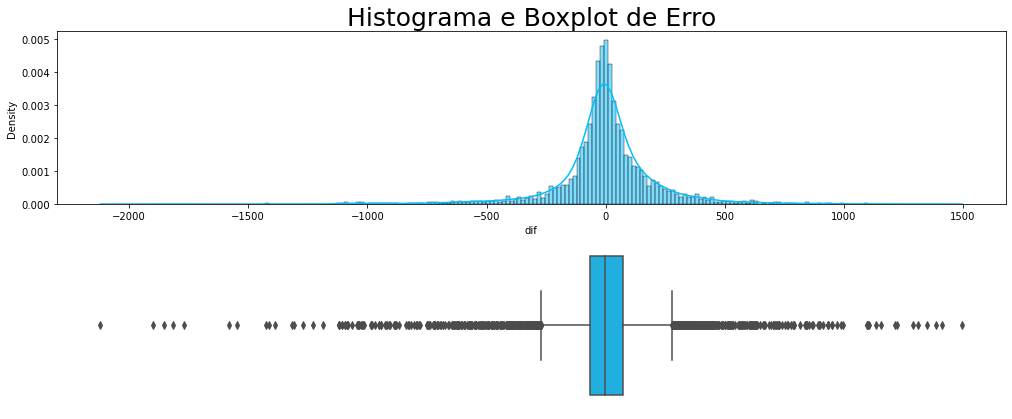

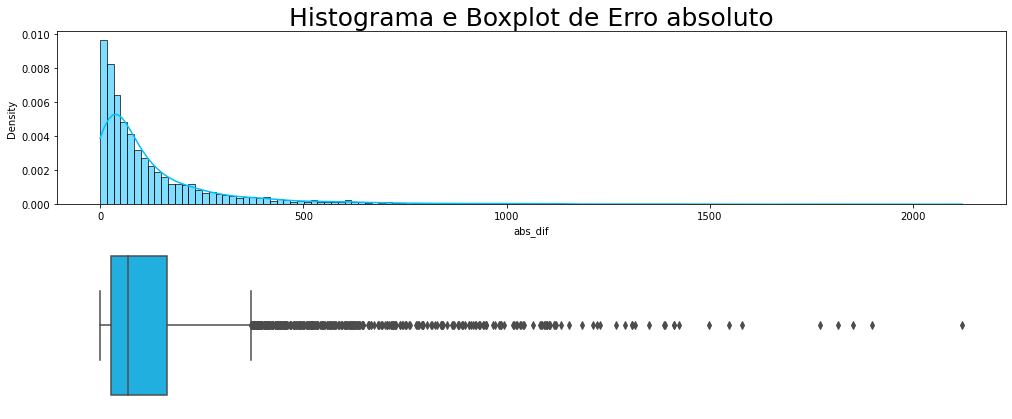

In [109]:
from matplotlib.gridspec import GridSpec
def distribution_plot(column, title, color='deepskyblue'): 

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histograma e Boxplot de {title}', fontdict = {'fontsize':25})
    sns.histplot(column, ax=ax0, kde=True, 
                 stat="density", color=color, 
                )

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color, 
               )

    
distribution_plot(df_mais_modelos['dif'], 'Erro')

distribution_plot(df_mais_modelos['abs_dif'], 'Erro absoluto')

* Nota-se que os maiores erros ocorrem quando os preditos são maiores que os alúguéis, ou seja, se preve muito mais do que o valor real, o que pode indicar a presença de outliers que o modelo não consegue identificar.

In [110]:
df_mais_modelos.abs_dif.quantile(.975)

725.4281782584419

In [111]:
df_mais_modelos.abs_dif.quantile(.99)

1023.3021200958204

In [112]:
# 1% dos dias com maior erro na previsão
outro_df = df_mais_modelos.loc[df_mais_modelos.abs_dif> df_mais_modelos.abs_dif.quantile(.99)]
outro_df

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,...,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos_voting
213,8,domingo,0,verão,32.7,0.00,61.8,1.21,0.50,1.57,2336,1,0,1,0,...,913.178253,901.290648,773.933113,893.262616,905.598384,907.552324,1197.317968,930.453599,1070.210530,1065.067483,1073.593661,943.597112,936.971114,994.225714,986.076090
454,22,quinta,0,verão,32.3,0.00,74.7,0.00,0.97,1.81,782,5,1,0,0,...,1777.295439,1887.472951,1859.396746,1880.917302,1827.066118,1862.005987,1797.727786,1889.373857,1758.491109,1946.944214,1848.980532,1886.685642,1713.304703,1798.601966,1825.617830
555,17,quarta,0,outono,35.0,0.00,51.3,0.36,0.92,1.81,15,4,1,0,1,...,1843.988760,1261.636901,1587.516523,1623.378188,1679.203757,1412.343148,1292.664267,783.282463,1216.871237,1111.034025,1143.402059,1055.941799,1550.769589,1573.699222,1440.332516
587,8,quinta,0,outono,29.7,0.00,61.1,0.76,0.96,1.45,834,5,1,1,0,...,2256.530246,2348.260580,2411.994321,2467.367884,2368.998220,2326.012364,2136.705716,1722.026061,2083.868284,2080.486219,2095.727710,2235.968647,2066.539872,1976.943721,2142.385585
594,8,domingo,0,outono,21.5,0.00,72.4,0.12,0.64,1.45,1911,1,0,1,0,...,566.485304,494.604928,453.074359,519.902387,517.988662,416.555538,499.947906,635.253494,500.519896,669.875748,508.116409,486.285387,515.225284,490.877664,522.919903
637,16,domingo,0,primavera,31.1,0.00,57.3,0.37,0.77,1.33,109,1,0,0,0,...,1165.880322,1158.098700,1047.214713,1249.664042,1194.125434,1409.903915,963.410647,1218.706060,1354.558897,1165.822094,1230.859236,1240.976966,1430.324893,1261.954203,1225.955328
832,8,domingo,0,outono,30.5,0.00,60.3,0.62,0.97,2.05,2406,1,0,1,0,...,1061.829325,1016.667454,1017.681104,889.482407,959.545880,939.932058,844.663872,980.117112,909.067117,804.337087,835.753593,987.254753,1024.600240,826.738879,908.809971
876,19,terça,0,outono,34.6,0.00,53.5,0.05,0.97,2.65,2523,3,1,0,1,...,1300.073974,1455.689873,1266.292690,1312.985417,1424.201003,1483.572164,1475.605674,1626.988646,1394.373057,1254.194677,1520.082105,1347.272844,1242.918261,1482.886234,1387.887072
1057,20,terça,0,outono,33.4,0.00,61.8,0.00,0.97,1.93,14,3,1,0,0,...,1143.687326,1280.011397,1426.276593,1282.793390,1132.380960,1447.860115,1272.156194,1260.230948,1539.964367,1329.780458,1270.667298,1223.417313,1187.222101,1338.985143,1284.398524
1098,13,terça,0,outono,33.9,0.00,47.5,1.72,0.97,1.93,14,3,1,0,0,...,1089.696043,1214.978365,1090.202424,1239.473726,1011.017963,1087.496371,1125.979614,1103.189716,920.927461,1161.743053,1032.579120,1255.149655,1037.537463,1063.542506,1078.011300


In [115]:
outro_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hora,45.0,NaN,NaN,NaN,14.555556,4.535494,7.0,8.0,16.0,18.0,22.0
dia,45,7,domingo,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feriado,45.0,NaN,NaN,NaN,0.022222,0.149071,0.0,0.0,0.0,0.0,1.0
estação,45,3,outono,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperatura,45.0,NaN,NaN,NaN,32.713333,3.155486,21.5,31.1,32.8,34.6,38.3
chuva,45.0,NaN,NaN,NaN,0.025778,0.120877,0.0,0.0,0.0,0.0,0.58
umidade,45.0,NaN,NaN,NaN,58.371111,11.139623,33.9,51.3,60.3,64.9,85.2
sol,45.0,NaN,NaN,NaN,0.779333,0.687087,0.0,0.12,0.65,1.13,2.56
visibilidade,45.0,NaN,NaN,NaN,0.828444,0.189376,0.36,0.77,0.93,0.97,0.97
vento,45.0,NaN,NaN,NaN,2.274,0.919462,0.73,1.57,2.05,2.89,4.45


# Modelos dias de inverno

* Nesta etapa buscou-se melhorar as previsões de inverno. Na EDA, observou-se uma padrão diferente na curva de demanda horária para esta estação. 
* Além dessa verificação (dias de inverno), também buscou-se analisar outros grupos para análise separad, porém, não apresentaram bons resultados no rmse

# Modelo 1 de inverno: Voting dos outros modelos

In [239]:
df_inverno_voting = preditos_voting(df_voting, weights = [3, 1, 1,
                                                        3, 1, 1,
                                                        1, 3, 3,
                                                        1, 3, 1,
                                                        1, 1, 1,
                                                        3, 1])


246.28225031495597
Exceto inverno:  278.68086137087414


<ipython-input-177-ca62cc3c662d>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_1 = data.groupby('estação')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
estação,,
inverno,73.421702,48.619881
outono,347.135702,210.716645
primavera,222.520215,139.847176
verão,253.267952,157.239382


<ipython-input-177-ca62cc3c662d>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_2 = data.groupby('dia')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
dia,,
domingo,319.474438,191.784716
quarta,225.217412,129.932092
quinta,224.327577,129.761327
segunda,207.152971,120.164229
sexta,240.741929,140.932781
sábado,221.118116,125.333864
terça,266.890058,145.642837


<ipython-input-177-ca62cc3c662d>:30: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analise_3 = data.groupby('hora')['erro_quadra', 'abs_dif'].mean()


,erro_quadra,abs_dif
hora,,
0,152.753140,96.801923
1,123.212418,90.034597
2,97.576962,68.762890
3,71.808727,46.646211
4,54.110335,37.166722
5,49.928220,35.161879
6,115.642601,82.280831
7,276.928181,190.925853
8,498.154096,367.090189


246.28225031495597
Exceto inverno:  278.68086137087414


In [249]:
df_inverno = df_inverno_voting.copy()
df_inverno = df_inverno.loc[df_inverno['estação'] == 'inverno'].reset_index()
df_inverno

,index,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,...,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos_voting
0,8,22,segunda,0,inverno,19.2,0.0,87.5,0.00,0.11,0.97,233,2,1,0,...,221.335651,192.535297,214.956485,198.239794,212.420915,220.115544,213.320914,222.982319,218.620136,218.446699,204.058533,219.137331,199.920385,223.765736,211.811058
1,10,22,sexta,0,inverno,8.6,0.0,48.3,0.00,0.85,2.41,122,6,1,0,...,142.444236,132.489885,131.967456,117.902349,122.604503,137.115671,123.104923,143.659769,115.350916,110.707697,115.245353,135.520113,114.132403,140.267015,130.458133
2,11,3,domingo,0,inverno,12.7,0.0,44.5,0.00,0.97,3.49,34,1,0,0,...,67.837780,71.571901,62.657326,80.139606,58.382901,90.083193,80.704498,60.752511,71.338624,63.348905,62.376858,77.144877,71.514946,102.268743,69.880772
3,13,21,domingo,0,inverno,13.5,0.0,43.7,0.00,0.97,4.45,120,1,0,0,...,156.870198,158.910916,164.212602,168.493438,158.332401,141.884618,141.970679,122.570799,111.630652,141.908505,155.442605,83.958676,144.939888,100.594244,141.435844
4,22,5,domingo,0,inverno,11.9,0.0,49.0,0.00,0.97,3.97,37,1,0,0,...,29.597834,50.679897,43.197790,47.226479,61.596306,40.188105,24.401276,27.268250,44.815484,40.102402,39.394120,41.411545,47.719254,44.297053,39.374047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,4485,16,segunda,0,inverno,17.2,0.0,31.7,1.41,0.93,2.65,254,2,1,0,...,227.052502,270.260385,266.936893,267.961185,253.139799,235.255530,190.131957,281.448619,231.391417,220.212986,223.751791,226.450428,228.930347,230.711246,240.533853
1055,4488,9,sábado,0,inverno,8.4,0.0,48.3,0.16,0.97,1.69,204,7,0,1,...,169.613946,104.544578,150.900289,149.328353,135.570477,226.768172,100.380861,193.456281,163.836526,117.225843,175.373803,172.341383,192.658283,177.518164,169.116242
1056,4492,17,terça,0,inverno,20.9,0.0,32.4,0.58,0.97,4.57,520,3,1,0,...,438.311158,425.755551,399.975000,435.717865,455.024974,443.239624,441.399537,450.708742,484.396405,434.736962,435.873587,501.393795,408.456404,508.126909,452.095394
1057,4493,18,sexta,0,inverno,15.3,0.0,60.3,0.09,0.97,4.57,158,6,1,0,...,405.055525,377.605199,373.042296,368.429240,291.972437,225.680330,432.612063,377.813240,303.123691,300.915128,371.024013,334.091701,240.468434,352.453118,318.309410


# Modelo 2 de inverno

In [229]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 400}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treino_pipe_inverno = treino.copy()

df_treino_pipe_inverno = df_treino_pipe_inverno.loc[df_treino_pipe_inverno['estação'] == 'inverno'].reset_index(drop=True)

df_treino_pipe_inverno = rmse_eval(df_treino_pipe_inverno.drop(columns = ['periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis = 1), pipe_final)



RSME treino e: 2.45, std: 0.05
RSME teste  e: 73.07, std: 9.72


# Modelo 3 de inverno

In [234]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

pipe_final = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())

df_treino_inverno = treino.copy()

df_treino_inverno = df_treino_inverno.loc[df_treino_inverno['estação'] == 'inverno'].reset_index(drop=True)


df_treino_inverno = rmse_eval(df_treino_inverno.drop(columns = ['aluguéis', 'horas_pico_tarde', 'periodo_dia', #'dia_util', 
                           'sol'], axis = 1), pipe_final)


RSME treino e: 2.21, std: 0.11
RSME teste  e: 74.20, std: 10.70


# Voting para os dias de inverno

In [250]:
df_voting_invernando = treino.copy()
df_voting_invernando = df_voting_invernando.loc[df_voting_invernando['estação']=='inverno'].reset_index()
df_voting_invernando['preditos1'] = df_inverno.preditos_voting
df_voting_invernando['preditos2'] = df_treino_pipe_inverno.preditos
df_voting_invernando['preditos3'] = df_treino_inverno.preditos

def preditos_voting_inverno(data, weights = [1,1,1]):
    
    data['preditos_voting'] = np.average(data[['preditos1', 'preditos2', 'preditos3', 
                                               ]], axis=1, weights=weights)
    
    
    data['abs_dif'] = abs(data['aluguéis'] - data.preditos_voting)
    data['erro_quadra'] = data['abs_dif'].pow(2)

    
    print(np.sqrt(data.erro_quadra.mean()))
    
    
    return data

preditos_voting_inverno(df_voting_invernando, weights = [1,1,1])

69.95654176928375


,index,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,preditos1,preditos2,preditos3,preditos_voting,abs_dif,erro_quadra
0,8,22,segunda,0,inverno,19.2,0.0,87.5,0.00,0.11,0.97,233,2,1,0,0,noite,211.811058,226.138224,213.110516,217.019933,15.980067,255.362547
1,10,22,sexta,0,inverno,8.6,0.0,48.3,0.00,0.85,2.41,122,6,1,0,0,noite,130.458133,124.928408,132.073712,129.153418,7.153418,51.171385
2,11,3,domingo,0,inverno,12.7,0.0,44.5,0.00,0.97,3.49,34,1,0,0,0,madrugada,69.880772,69.807832,67.752401,69.147002,35.147002,1235.311718
3,13,21,domingo,0,inverno,13.5,0.0,43.7,0.00,0.97,4.45,120,1,0,0,0,noite,141.435844,135.509518,172.093299,149.679554,29.679554,880.875907
4,22,5,domingo,0,inverno,11.9,0.0,49.0,0.00,0.97,3.97,37,1,0,0,0,madrugada,39.374047,43.238242,69.626878,50.746389,13.746389,188.963214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,4485,16,segunda,0,inverno,17.2,0.0,31.7,1.41,0.93,2.65,254,2,1,0,0,tarde,240.533853,258.458197,277.043884,258.678645,4.678645,21.889716
1055,4488,9,sábado,0,inverno,8.4,0.0,48.3,0.16,0.97,1.69,204,7,0,1,0,manha,169.116242,142.984840,183.625138,165.242073,38.757927,1502.176893
1056,4492,17,terça,0,inverno,20.9,0.0,32.4,0.58,0.97,4.57,520,3,1,0,1,tarde,452.095394,461.775405,436.238319,450.036373,69.963627,4894.909130
1057,4493,18,sexta,0,inverno,15.3,0.0,60.3,0.09,0.97,4.57,158,6,1,0,1,noite,318.309410,350.473246,345.577404,338.120020,180.120020,32443.221578


In [257]:
preditos_voting_inverno(df_voting_invernando, weights = [3,2,1])

69.71107171145972


,index,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,preditos1,preditos2,preditos3,preditos_voting,abs_dif,erro_quadra
0,8,22,segunda,0,inverno,19.2,0.0,87.5,0.00,0.11,0.97,233,2,1,0,0,noite,211.811058,226.138224,213.110516,216.803356,16.196644,262.331262
1,10,22,sexta,0,inverno,8.6,0.0,48.3,0.00,0.85,2.41,122,6,1,0,0,noite,130.458133,124.928408,132.073712,128.884154,6.884154,47.391583
2,11,3,domingo,0,inverno,12.7,0.0,44.5,0.00,0.97,3.49,34,1,0,0,0,madrugada,69.880772,69.807832,67.752401,69.501730,35.501730,1260.372842
3,13,21,domingo,0,inverno,13.5,0.0,43.7,0.00,0.97,4.45,120,1,0,0,0,noite,141.435844,135.509518,172.093299,144.569978,24.569978,603.683814
4,22,5,domingo,0,inverno,11.9,0.0,49.0,0.00,0.97,3.97,37,1,0,0,0,madrugada,39.374047,43.238242,69.626878,45.704251,8.704251,75.763979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,4485,16,segunda,0,inverno,17.2,0.0,31.7,1.41,0.93,2.65,254,2,1,0,0,tarde,240.533853,258.458197,277.043884,252.593639,1.406361,1.977850
1055,4488,9,sábado,0,inverno,8.4,0.0,48.3,0.16,0.97,1.69,204,7,0,1,0,manha,169.116242,142.984840,183.625138,162.823924,41.176076,1695.469257
1056,4492,17,terça,0,inverno,20.9,0.0,32.4,0.58,0.97,4.57,520,3,1,0,1,tarde,452.095394,461.775405,436.238319,452.679219,67.320781,4532.087590
1057,4493,18,sexta,0,inverno,15.3,0.0,60.3,0.09,0.97,4.57,158,6,1,0,1,noite,318.309410,350.473246,345.577404,333.575354,175.575354,30826.705012


* Com a análise separada dos dias de inverno, o rmse de teste teve uma melhora de quase 4 

***

# <font color=red> SUBMISSÃO 8: 17 modelos + alteração do inverno

## Modelo 1

In [307]:
preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, ['temperatura', #'chuva', 
                                       'umidade', #'sol', 
                                       'visibilidade', 'vento'
                                      ]),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva'])
    ],
    remainder = sc)

preprocessor_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', #'chuva', 
                                    'umidade', 'sol', 
                                    'visibilidade', 'vento'
                                   ]),
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_valores_inversos_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', #'chuva', 
                                            'umidade', #'sol', 
                                            'visibilidade', 'vento'
                                           ]),
    ],
    remainder='drop')), ('transform', sc)])

uniao = FeatureUnion([('ct1', preprocessor_dummy), 
                      ('ct2', preprocessor_raiz),
                      ('ct3', preprocessor_valores_inversos_raiz),
                      ('ct4', preprocessor_valores_inversos)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.147011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                         # include_bias = False
                         )), ('selection', SelectFromModel(LGBMRegressor(random_state=1986)))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_1 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando = treino.copy()
df_testando = teste.copy()

X_final = df_treinando.drop(columns = ['aluguéis'], axis = 1)
y_final = df_treinando['aluguéis']

modelo_final_1.fit(X_final, y_final)
preditos_final_1 = modelo_final_1.predict(df_testando)

df_testando['preditos1'] = preditos_final_1

## Modelo 2

In [308]:
preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, ['temperatura', 'umidade', 'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_valores_raiz = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', 'chuva', 'umidade', #'sol', 
                                    'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_valores_raiz_inverso = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', 'umidade', 'visibilidade', 'vento']),
    ],
    remainder='drop')), ('transform', sc)])

variaveis_cat = ['estação', 'periodo_dia', 'dia']

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    ('sol', func_sol_bin, ['sol'])
    
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), 
                      ('ct12', preprocessor_valores_raiz),
                      ('ct13', preprocessor_valores_raiz_inverso),
                      ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.647011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_2 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando2 = treino.copy()
df_testando2 = teste.copy()

X_final2 = df_treinando2.drop(columns = ['aluguéis'], axis = 1)
y_final2 = df_treinando2['aluguéis']

modelo_final_2.fit(X_final2, y_final2)
preditos_final_2 = modelo_final_2.predict(df_testando2)

df_testando['preditos2'] = preditos_final_2


## Modelo 3

In [309]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_2 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())

df_treinando2 = treino.copy()
df_testando2 = teste.copy()
df_testando2 = df_testando2.drop(columns=['sol'], axis=1)

X_final2 = df_treinando2.drop(columns = ['aluguéis', 'sol'], axis = 1)
y_final2 = df_treinando2['aluguéis']

modelo_final_2.fit(X_final2, y_final2)
preditos_final_2 = modelo_final_2.predict(df_testando2)

df_testando['preditos3'] = preditos_final_2

## Modelo 4

In [310]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_2 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando2 = treino.copy()
df_testando2 = teste.copy()
df_testando2 = df_testando2.drop(columns=['sol'], axis=1)

X_final2 = df_treinando2.drop(columns = ['aluguéis', 'sol'], axis = 1)
y_final2 = df_treinando2['aluguéis']

modelo_final_2.fit(X_final2, y_final2)
preditos_final_2 = modelo_final_2.predict(df_testando2)

df_testando['preditos4'] = preditos_final_2

## Modelo 5

In [311]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]
preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=['vento'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis', 'vento'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos5'] = preditos_final_3


## Modelo 6

In [312]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)


preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, ['temperatura', #'chuva', 
                                            'umidade', 
                                            #'sol', 
                                            'visibilidade',
                                            #'vento'
                                           ]),
    ],
    remainder='drop')), 
                                                  ('transform', sc)
                                                 ])


uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.076788993498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())




df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=['vento', 'sol'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis', 'vento', 'sol'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos6'] = preditos_final_3



## Modelo 7

In [313]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), 
                                                  ('transform', sc)
                                                 ])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    ('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.06788993498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=['vento', 'sol'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis', 'vento', 'sol'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos7'] = preditos_final_3



## Modelo 8

In [314]:
preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_raiz, ['temperatura', #'chuva', 
                                    'umidade', #'sol', 
                                    'visibilidade', #'vento'
                                   ]),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])


SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=['sol', 'vento', 'horas_pico_tarde', 'periodo_dia'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis','sol', 'vento', 'horas_pico_tarde', 'periodo_dia'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos8'] = preditos_final_3


## Modelo 9

In [315]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos_ = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, colunas_numericas),

    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos_), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 15, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.001) # gamma


preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=['periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis','periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos9'] = preditos_final_3

## Modelo 10

In [316]:
SEED = 1986
np.random.seed(SEED)

colunas_numericas = ['temperatura', 'chuva', 
                     'umidade', 'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos_2nd =Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos_2nd), ('ct2', preprocessor_dummy)])

best_params = {'reg_alpha': 0.47011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 14, 
               'learning_rate': 0.09393498461223962, 'n_estimators': 550}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001
                           ) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),('polynom', poly)]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_5 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando5 = treino.copy()
df_testando5 = teste.copy()

df_treinando5 = dados_horas_picos(df_treinando5)
df_testando5 = dados_horas_picos(df_testando5)
df_testando5 = df_testando5.drop(columns = ['vento', 'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis=1)

X_final2 = df_treinando5.drop(columns = ['aluguéis', 'vento', 'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha'], axis = 1)
y_final2 = df_treinando5['aluguéis']

modelo_final_5.fit(X_final2, y_final2)
preditos_final_5 = modelo_final_5.predict(df_testando5)

df_testando['preditos10'] = preditos_final_5

## Modelo 11

In [317]:
df_teste_grid = pd.read_csv('df_teste_grid_one.csv')
df_testando['preditos11'] = df_teste_grid['preditos7']

## Modelo 12

In [318]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}

modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) 

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'horas_pico_tarde', 'periodo_dia'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis',  'horas_pico_tarde', 'periodo_dia'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos12'] = preditos_final_3

## Modelo 13

In [319]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])


preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    #('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)
uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])


SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'horas_pico_tarde', 'periodo_dia', 'vento'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis',  'horas_pico_tarde', 'periodo_dia', 'vento'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos13'] = preditos_final_3

## Modelo 14

In [320]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 
                     #'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.0788993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'horas_pico_tarde', 'periodo_dia', 'vento'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis',  'horas_pico_tarde', 'periodo_dia', 'vento'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos14'] = preditos_final_3

## Modelo 15

In [321]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    ('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
   # ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())




df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'horas_pico_tarde', 'horas_pico_manha'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis',  'horas_pico_tarde', 'horas_pico_manha'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos15'] = preditos_final_3

## Modelo 16

In [322]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])


SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'horas_pico_tarde', 'periodo_dia'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis',  'horas_pico_tarde', 'periodo_dia'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos16'] = preditos_final_3

# Modelo 17

In [323]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 600}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_3 = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando3 = treino.copy()
df_testando3 = teste.copy()
df_testando3 = df_testando3.drop(columns=[  'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis=1)

X_final = df_treinando3.drop(columns = ['aluguéis', 'periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis = 1)
y_final = df_treinando3['aluguéis']

modelo_final_3.fit(X_final, y_final)
preditos_final_3 = modelo_final_3.predict(df_testando3)

df_testando['preditos17'] = preditos_final_3

In [324]:
df_testando

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,...,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17
0,21,quinta,0,verão,33.3,0.12,72.4,0.0,0.88,2.05,5,1,0,0,noite,...,817.182340,576.335893,631.817928,624.822003,538.058352,663.550340,655.594228,462.271170,608.752623,502.194256,635.507010,892.473821,737.520250,563.739417,586.684441
1,0,segunda,0,outono,25.0,0.00,73.1,0.0,0.34,0.85,2,1,0,0,madrugada,...,400.759626,423.133442,414.524619,423.980054,383.474530,415.679778,371.205161,373.831902,529.713532,396.199145,380.624114,422.272791,439.035576,401.178989,366.659555
2,4,segunda,0,outono,22.1,0.00,67.9,0.0,0.97,1.09,2,1,0,0,madrugada,...,180.452274,167.746844,171.665503,158.331506,189.619309,199.669702,150.549303,172.395087,161.726900,150.270963,202.629380,163.626814,159.903823,198.122846,170.756407
3,6,terça,0,verão,36.5,0.00,80.7,0.0,0.53,1.93,3,1,0,0,manha,...,491.460837,514.962091,443.660047,544.389198,553.678807,518.248641,452.672423,463.970103,536.957270,520.127381,523.727263,500.301727,494.332092,522.238333,473.598302
4,21,quinta,0,verão,34.2,0.00,65.6,0.0,0.71,2.05,5,1,0,0,noite,...,2183.122410,2207.229258,2046.601807,2085.658822,2143.007239,2243.133797,2091.171321,2125.131001,2239.565172,2023.358192,2169.530393,2171.674039,2015.920954,1989.169670,2148.072634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,23,sábado,0,primavera,18.5,0.00,46.8,0.0,0.92,0.49,7,0,0,0,noite,...,370.119184,308.934261,305.549564,286.523065,316.836059,332.181374,328.343926,308.920492,395.259717,295.683495,266.441058,292.429536,310.027207,287.576507,335.268820
2996,21,domingo,0,inverno,15.5,0.00,62.6,0.0,0.60,3.85,1,0,0,0,noite,...,252.785797,214.237508,224.242180,204.682135,237.295382,219.028308,242.939406,221.480211,174.728660,213.569833,230.527615,240.247556,249.894862,198.999599,194.935407
2997,23,sexta,0,inverno,22.0,0.00,78.4,0.0,0.13,3.49,6,1,0,0,noite,...,309.762425,267.194052,304.464349,317.189256,294.395194,321.445529,264.221871,314.496494,320.330093,283.385387,333.645326,321.978960,267.735330,251.843748,269.182155
2998,4,quinta,0,verão,36.6,0.00,70.1,0.0,0.97,1.45,5,1,0,0,madrugada,...,195.771289,185.727942,249.321265,232.373868,243.209720,226.899931,189.445836,242.626068,242.877326,189.996188,253.091789,233.373187,255.118243,179.490717,241.757561


In [325]:
df_testando.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos1,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.321333,0.045667,26.733167,0.178467,61.65400,0.550923,0.704873,2.308680,4.004333,0.655667,0.129667,0.122333,713.785243,712.362005,710.985153,711.452762,707.226834,706.508453,707.363146,707.946466,711.761404,709.089198,713.189347,712.457717,710.245822,710.928430,716.194618,710.602503,711.400470
std,7.007219,0.208796,7.948736,1.360816,15.51968,0.853927,0.292423,1.238283,2.036098,0.475230,0.335992,0.327725,595.570134,594.864740,596.797646,596.375249,594.533931,597.432769,594.522880,595.088065,592.274500,594.075546,591.576261,593.953832,594.062303,592.998125,596.403081,590.997966,596.915193
min,0.000000,0.000000,7.300000,0.000000,18.10000,0.000000,0.020000,0.250000,1.000000,0.000000,0.000000,0.000000,-110.762093,-89.588278,-99.712696,-167.401545,-167.151411,-54.002523,-233.447008,-109.842945,-109.339026,-253.185088,-79.975948,-127.466957,-184.497698,-167.152231,-143.638724,-107.369617,-155.803388
25%,5.000000,0.000000,20.300000,0.000000,49.60000,0.000000,0.470000,1.330000,2.000000,0.000000,0.000000,0.000000,234.281436,237.242087,231.735774,234.085533,231.235315,231.617071,232.865755,231.007895,234.366134,234.843972,235.782571,235.887427,234.122513,233.310978,236.048184,235.312365,232.864081
50%,11.000000,0.000000,27.300000,0.000000,60.30000,0.000000,0.830000,2.050000,4.000000,1.000000,0.000000,0.000000,532.584967,518.959926,522.628740,523.920658,529.423288,521.907725,526.907878,512.549197,528.406123,526.510071,519.727065,523.986756,524.086336,525.657067,529.223856,526.683276,529.096262
75%,17.000000,0.000000,33.100000,0.000000,73.90000,0.882500,0.970000,3.010000,6.000000,1.000000,0.000000,0.000000,1057.721975,1055.288892,1048.653811,1047.917648,1050.230698,1045.221344,1039.796506,1051.250080,1058.638466,1053.041141,1062.801703,1061.599699,1053.752507,1063.367965,1054.614267,1051.790527,1060.302937
max,23.000000,1.000000,44.100000,40.320000,92.00000,3.520000,0.970000,7.570000,7.000000,1.000000,1.000000,1.000000,3351.173776,3241.763565,3302.398348,3312.148739,3298.301064,3355.949125,3288.949594,3399.989602,3260.559745,3305.478853,3194.552012,3175.582769,3201.528735,3247.775574,3249.753399,3226.922310,3309.063784


In [327]:
df_testando['preditos'] = np.average(df_testando[['preditos1', 'preditos2', 'preditos3', 
                                               'preditos4', 'preditos5', 'preditos6', 
                                               'preditos7', 'preditos8', 'preditos9',
                                               'preditos10', 'preditos11','preditos12', 'preditos13',
                                              'preditos14', 'preditos15',
                                              'preditos16',
                                              'preditos17']], 
                                     axis=1, weights = [1, .5, 2,
                                                        .5, .5, .5,
                                                        .5, 4, 2,
                                                        4, .5, 2,
                                                        4, .5, .5,
                                                        4, 4])



In [328]:
df_testando.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos1,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.321333,0.045667,26.733167,0.178467,61.65400,0.550923,0.704873,2.308680,4.004333,0.655667,0.129667,0.122333,713.785243,712.362005,710.985153,711.452762,707.226834,706.508453,707.363146,707.946466,711.761404,709.089198,713.189347,712.457717,710.245822,710.928430,716.194618,710.602503,711.400470,710.449820
std,7.007219,0.208796,7.948736,1.360816,15.51968,0.853927,0.292423,1.238283,2.036098,0.475230,0.335992,0.327725,595.570134,594.864740,596.797646,596.375249,594.533931,597.432769,594.522880,595.088065,592.274500,594.075546,591.576261,593.953832,594.062303,592.998125,596.403081,590.997966,596.915193,590.610966
min,0.000000,0.000000,7.300000,0.000000,18.10000,0.000000,0.020000,0.250000,1.000000,0.000000,0.000000,0.000000,-110.762093,-89.588278,-99.712696,-167.401545,-167.151411,-54.002523,-233.447008,-109.842945,-109.339026,-253.185088,-79.975948,-127.466957,-184.497698,-167.152231,-143.638724,-107.369617,-155.803388,-115.496186
25%,5.000000,0.000000,20.300000,0.000000,49.60000,0.000000,0.470000,1.330000,2.000000,0.000000,0.000000,0.000000,234.281436,237.242087,231.735774,234.085533,231.235315,231.617071,232.865755,231.007895,234.366134,234.843972,235.782571,235.887427,234.122513,233.310978,236.048184,235.312365,232.864081,232.107739
50%,11.000000,0.000000,27.300000,0.000000,60.30000,0.000000,0.830000,2.050000,4.000000,1.000000,0.000000,0.000000,532.584967,518.959926,522.628740,523.920658,529.423288,521.907725,526.907878,512.549197,528.406123,526.510071,519.727065,523.986756,524.086336,525.657067,529.223856,526.683276,529.096262,525.304583
75%,17.000000,0.000000,33.100000,0.000000,73.90000,0.882500,0.970000,3.010000,6.000000,1.000000,0.000000,0.000000,1057.721975,1055.288892,1048.653811,1047.917648,1050.230698,1045.221344,1039.796506,1051.250080,1058.638466,1053.041141,1062.801703,1061.599699,1053.752507,1063.367965,1054.614267,1051.790527,1060.302937,1055.932794
max,23.000000,1.000000,44.100000,40.320000,92.00000,3.520000,0.970000,7.570000,7.000000,1.000000,1.000000,1.000000,3351.173776,3241.763565,3302.398348,3312.148739,3298.301064,3355.949125,3288.949594,3399.989602,3260.559745,3305.478853,3194.552012,3175.582769,3201.528735,3247.775574,3249.753399,3226.922310,3309.063784,3236.517925


## Alterando as linhas de inverno

## Inverno: Modelo 1 - voting

In [329]:
df_testando_inverno = df_testando.copy()
df_testando_inverno['preditos1_inv'] = np.average(df_testando_inverno[['preditos', 'preditos2', 'preditos3', 
                                               'preditos4', 'preditos5', 'preditos6', 
                                               'preditos7', 'preditos8', 'preditos9',
                                               'preditos10', 'preditos11','preditos12', 'preditos13',
                                              'preditos14', 'preditos15',
                                              'preditos16',
                                              'preditos17']], 
                                     axis=1, weights = [3, 1, 1,
                                                        3, 1, 1,
                                                        1, 3, 3,
                                                        1, 3, 1,
                                                        1, 1, 1,
                                                        3, 1])


In [330]:
df_testando_inverno = df_testando_inverno.loc[df_testando_inverno['estação'] == 'inverno']
df_testando_inverno

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,...,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos,preditos1_inv
7,1,sábado,0,inverno,17.1,0.0,70.1,0.00,0.39,6.25,7,0,0,0,madrugada,...,202.671392,218.789863,233.572920,234.247859,278.238363,282.733943,187.591846,229.475350,213.190049,252.687457,229.640124,245.486907,222.922479,235.522622,231.057659
8,19,terça,0,inverno,17.1,0.0,42.2,0.00,0.97,2.05,3,1,0,1,noite,...,364.516031,325.926399,369.782157,366.591219,349.766988,357.701948,457.535245,360.449688,354.252443,371.741361,380.761545,372.193732,357.002758,362.503029,374.372700
12,2,sábado,0,inverno,15.5,0.0,58.1,0.00,0.93,1.45,7,0,0,0,madrugada,...,155.325779,153.447404,143.552418,171.706704,180.422408,162.372724,147.232413,177.910340,149.502869,149.138884,180.625291,156.007832,162.826496,162.783500,163.731775
13,2,domingo,0,inverno,13.1,0.0,56.6,0.00,0.79,2.53,1,0,0,0,madrugada,...,122.278884,128.453522,117.687900,121.591580,108.716258,112.967624,121.891810,131.426518,107.321400,114.591334,112.168254,108.886388,106.137061,114.547446,117.380699
18,9,terça,0,inverno,10.5,0.0,52.8,0.10,0.95,3.73,3,1,1,0,manha,...,271.124969,275.015553,272.682967,287.397250,245.647803,258.864295,254.481599,260.926283,286.675005,315.004328,251.104403,270.078394,319.853813,274.832650,267.451946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,22,quarta,0,inverno,19.9,0.0,90.5,0.00,0.59,2.53,4,1,0,0,noite,...,145.567165,191.449138,70.086166,154.312288,104.485693,139.162286,127.321526,104.562202,126.866765,167.723887,122.145822,103.991366,184.999752,128.651627,125.369335
2990,17,sexta,0,inverno,14.6,0.0,42.2,0.53,0.97,5.77,6,1,0,1,tarde,...,323.091655,344.219486,310.972142,343.062911,254.970010,292.038319,318.986969,264.406438,298.197548,283.446659,270.497137,253.887363,276.419756,285.164245,285.608609
2992,21,segunda,0,inverno,20.6,0.0,62.6,0.00,0.23,1.21,2,1,0,0,noite,...,415.826778,405.058911,388.239384,469.050444,374.735598,421.964910,335.681683,419.227094,404.954481,433.980665,412.267997,420.656853,412.343717,413.876644,400.431794
2996,21,domingo,0,inverno,15.5,0.0,62.6,0.00,0.60,3.85,1,0,0,0,noite,...,224.242180,204.682135,237.295382,219.028308,242.939406,221.480211,174.728660,213.569833,230.527615,240.247556,249.894862,198.999599,194.935407,219.214204,216.943216


## Inverno: Modelo 2

In [331]:
preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    #('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
    #('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 400}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", preprocessor_dummy),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = True,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_inverno = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())



df_treinando5 = treino.copy()
df_testando5 = teste.copy()

df_treinando5 = df_treinando5.loc[df_treinando3['estação'] == 'inverno']
df_testando5 = df_testando5.loc[df_testando3['estação'] == 'inverno']
df_testando5 = df_testando5.drop(columns=['periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis=1)

X_final3 = df_treinando5.drop(columns = ['aluguéis','periodo_dia', 'horas_pico_tarde', 'horas_pico_manha', 'vento'], axis = 1)
y_final3 = df_treinando5['aluguéis']

modelo_final_inverno.fit(X_final3, y_final3)
preditos_final_5 = modelo_final_inverno.predict(df_testando5)

df_testando5['preditos2'] = preditos_final_5

df_testando_inverno['preditos2_inv'] = preditos_final_5

## Inverno: Modelo 3

In [332]:
colunas_numericas = ['temperatura', #'chuva', 
                     'umidade', #'sol', 
                     'visibilidade', 'vento'
                    ]

preprocessor_valores_inversos = Pipeline(steps = [('coluna', ColumnTransformer([
    ('colunas_inverso', func_inverso_raiz, colunas_numericas),
   # ('horas_spiline', out_encoder, ['hora'])
    ],
    remainder='drop')), ('transform', sc)])

preprocessor_dummy = ColumnTransformer([
    ('estação', one_hot, ['estação']),
    #('periodo_dia', one_hot, ['periodo_dia']),
    ('dia', one_hot, ['dia']),
    ('util', one_hot, ['dia_util']),
    #('tarde', one_hot, ['horas_pico_tarde']),
    ('feriado', one_hot, [ 'feriado']),
    ('manha', one_hot, ['horas_pico_manha']),
    ('chuva', func_chuva_bin, ['chuva']),
   # ('sol', func_sol_bin, ['sol'])
    ],
    remainder = sc)

uniao = FeatureUnion([('ct1', preprocessor_valores_inversos), ('ct2', preprocessor_dummy)])

# com normalização
SEED = 1986
np.random.seed(SEED)

best_params = {'reg_alpha': 0.047011317959931775, 'reg_lambda': 2.5342856114981028e-08, 
               'num_leaves': 34, 'colsample_bytree': 0.7941351086134166, 
               'subsample': 0.955348605472845, 'subsample_freq': 5, 
               'min_child_samples': 5, 'max_depth': 13, 
               'learning_rate': 0.088993498461223962, 'n_estimators': 450}


modelo_base = LGBMRegressor(**best_params,
                           min_split_gain = 0.0001) # gamma

preprocessor = Pipeline(steps=[("uniao", uniao),
                               ('polynom', PolynomialFeatures(degree=2, interaction_only = False,
                          include_bias = False
                         ))]) # poly interaction_only = False

pipe_model = Pipeline(steps=[('prepross', preprocessor), ('modelo', modelo_base)])

modelo_final_inverno = TransformedTargetRegressor(regressor=pipe_model,
                                   transformer = StandardScaler())


df_treinando5 = treino.copy()
df_testando5 = teste.copy()

df_treinando5 = df_treinando5.loc[df_treinando3['estação'] == 'inverno']
df_testando5 = df_testando5.loc[df_testando3['estação'] == 'inverno']
df_testando5 = df_testando5.drop(columns=['periodo_dia', 'horas_pico_tarde', 'periodo_dia', 'sol'], axis=1)

X_final3 = df_treinando5.drop(columns = ['aluguéis','horas_pico_tarde', 'periodo_dia', 'sol'], axis = 1)
y_final3 = df_treinando5['aluguéis']

modelo_final_inverno.fit(X_final3, y_final3)
preditos_final_5 = modelo_final_inverno.predict(df_testando5)

df_testando5['preditos3'] = preditos_final_5

df_testando_inverno['preditos3_inv'] = preditos_final_5

In [333]:
df_testando_inverno

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,...,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos,preditos1_inv,preditos2_inv,preditos3_inv
7,1,sábado,0,inverno,17.1,0.0,70.1,0.00,0.39,6.25,7,0,0,0,madrugada,...,233.572920,234.247859,278.238363,282.733943,187.591846,229.475350,213.190049,252.687457,229.640124,245.486907,222.922479,235.522622,231.057659,270.797364,256.200432
8,19,terça,0,inverno,17.1,0.0,42.2,0.00,0.97,2.05,3,1,0,1,noite,...,369.782157,366.591219,349.766988,357.701948,457.535245,360.449688,354.252443,371.741361,380.761545,372.193732,357.002758,362.503029,374.372700,384.472689,404.657075
12,2,sábado,0,inverno,15.5,0.0,58.1,0.00,0.93,1.45,7,0,0,0,madrugada,...,143.552418,171.706704,180.422408,162.372724,147.232413,177.910340,149.502869,149.138884,180.625291,156.007832,162.826496,162.783500,163.731775,153.249444,174.223598
13,2,domingo,0,inverno,13.1,0.0,56.6,0.00,0.79,2.53,1,0,0,0,madrugada,...,117.687900,121.591580,108.716258,112.967624,121.891810,131.426518,107.321400,114.591334,112.168254,108.886388,106.137061,114.547446,117.380699,107.834503,107.842237
18,9,terça,0,inverno,10.5,0.0,52.8,0.10,0.95,3.73,3,1,1,0,manha,...,272.682967,287.397250,245.647803,258.864295,254.481599,260.926283,286.675005,315.004328,251.104403,270.078394,319.853813,274.832650,267.451946,337.153807,300.018530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,22,quarta,0,inverno,19.9,0.0,90.5,0.00,0.59,2.53,4,1,0,0,noite,...,70.086166,154.312288,104.485693,139.162286,127.321526,104.562202,126.866765,167.723887,122.145822,103.991366,184.999752,128.651627,125.369335,116.352813,97.686058
2990,17,sexta,0,inverno,14.6,0.0,42.2,0.53,0.97,5.77,6,1,0,1,tarde,...,310.972142,343.062911,254.970010,292.038319,318.986969,264.406438,298.197548,283.446659,270.497137,253.887363,276.419756,285.164245,285.608609,208.459494,221.681555
2992,21,segunda,0,inverno,20.6,0.0,62.6,0.00,0.23,1.21,2,1,0,0,noite,...,388.239384,469.050444,374.735598,421.964910,335.681683,419.227094,404.954481,433.980665,412.267997,420.656853,412.343717,413.876644,400.431794,360.816699,310.956926
2996,21,domingo,0,inverno,15.5,0.0,62.6,0.00,0.60,3.85,1,0,0,0,noite,...,237.295382,219.028308,242.939406,221.480211,174.728660,213.569833,230.527615,240.247556,249.894862,198.999599,194.935407,219.214204,216.943216,267.946654,263.972557


In [334]:
df_testando_inverno.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos1,preditos2,preditos3,...,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos,preditos1_inv,preditos2_inv,preditos3_inv
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,11.403351,0.094072,16.740206,0.066366,55.340077,0.304549,0.703003,2.538969,3.914948,0.610825,0.127577,0.114691,239.382831,244.713756,241.630283,...,237.145718,238.743274,236.837879,242.644019,240.825365,240.363629,241.559163,237.957790,239.143523,235.486034,238.047177,239.390651,239.125424,237.639450,238.876014
std,7.031427,0.292117,3.594671,0.676481,14.871784,0.545873,0.308560,1.393012,2.057366,0.487878,0.333834,0.318854,134.298131,133.410878,134.863140,...,132.205201,129.177277,125.844485,134.554921,127.555629,131.097724,133.079270,129.387379,127.974351,128.896463,127.294089,127.298476,126.327566,124.660211,125.164181
min,0.000000,0.000000,7.300000,0.000000,28.700000,0.000000,0.030000,0.250000,1.000000,0.000000,0.000000,0.000000,2.634233,-32.474528,-14.697821,...,6.769602,-21.848457,-8.707586,-13.081347,30.957831,-19.824337,-10.529652,-22.182842,-5.082984,-36.962288,-13.144211,2.709194,4.621431,29.046018,37.934014
25%,5.000000,0.000000,14.300000,0.000000,43.000000,0.000000,0.467500,1.330000,2.000000,0.000000,0.000000,0.000000,141.948627,151.367955,141.843437,...,142.534568,145.516674,145.378880,149.239618,152.249235,145.723927,144.097789,148.685576,143.005729,141.399391,143.925874,146.697616,147.086587,140.021025,141.349935
50%,11.000000,0.000000,17.100000,0.000000,52.800000,0.000000,0.855000,2.290000,4.000000,1.000000,0.000000,0.000000,221.017614,229.027066,226.241806,...,222.708571,224.587071,222.087110,224.177744,227.788929,225.652669,227.863116,223.360271,229.762659,220.247956,225.984844,224.488591,225.968380,228.688463,228.427534
75%,17.000000,0.000000,19.500000,0.000000,65.600000,0.430000,0.970000,3.490000,6.000000,1.000000,0.000000,0.000000,314.766801,328.186171,322.441329,...,312.411270,311.230010,305.586441,322.457315,310.830966,312.073908,321.014719,312.213317,321.663639,314.948764,317.347678,315.097072,312.199438,318.161743,312.496895
max,23.000000,1.000000,24.900000,10.940000,91.200000,2.500000,0.970000,7.450000,7.000000,1.000000,1.000000,1.000000,921.912694,869.397719,817.830842,...,843.588824,781.948533,758.238034,783.733995,783.009830,853.683146,820.737282,786.241604,809.652951,753.785923,714.075717,788.765324,789.027872,699.210017,719.428667


In [335]:
df_testando_inverno['preditos_inverno'] = np.average(df_testando_inverno[['preditos1_inv', 'preditos1_inv', 'preditos3_inv', 
                                          ]], 
                                     axis=1, weights = [3, 2, 1])


In [336]:
df_testando_inverno.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos1,preditos2,preditos3,...,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos,preditos1_inv,preditos2_inv,preditos3_inv,preditos_inverno
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,11.403351,0.094072,16.740206,0.066366,55.340077,0.304549,0.703003,2.538969,3.914948,0.610825,0.127577,0.114691,239.382831,244.713756,241.630283,...,238.743274,236.837879,242.644019,240.825365,240.363629,241.559163,237.957790,239.143523,235.486034,238.047177,239.390651,239.125424,237.639450,238.876014,239.083856
std,7.031427,0.292117,3.594671,0.676481,14.871784,0.545873,0.308560,1.393012,2.057366,0.487878,0.333834,0.318854,134.298131,133.410878,134.863140,...,129.177277,125.844485,134.554921,127.555629,131.097724,133.079270,129.387379,127.974351,128.896463,127.294089,127.298476,126.327566,124.660211,125.164181,125.109865
min,0.000000,0.000000,7.300000,0.000000,28.700000,0.000000,0.030000,0.250000,1.000000,0.000000,0.000000,0.000000,2.634233,-32.474528,-14.697821,...,-21.848457,-8.707586,-13.081347,30.957831,-19.824337,-10.529652,-22.182842,-5.082984,-36.962288,-13.144211,2.709194,4.621431,29.046018,37.934014,13.405113
25%,5.000000,0.000000,14.300000,0.000000,43.000000,0.000000,0.467500,1.330000,2.000000,0.000000,0.000000,0.000000,141.948627,151.367955,141.843437,...,145.516674,145.378880,149.239618,152.249235,145.723927,144.097789,148.685576,143.005729,141.399391,143.925874,146.697616,147.086587,140.021025,141.349935,146.781125
50%,11.000000,0.000000,17.100000,0.000000,52.800000,0.000000,0.855000,2.290000,4.000000,1.000000,0.000000,0.000000,221.017614,229.027066,226.241806,...,224.587071,222.087110,224.177744,227.788929,225.652669,227.863116,223.360271,229.762659,220.247956,225.984844,224.488591,225.968380,228.688463,228.427534,225.305805
75%,17.000000,0.000000,19.500000,0.000000,65.600000,0.430000,0.970000,3.490000,6.000000,1.000000,0.000000,0.000000,314.766801,328.186171,322.441329,...,311.230010,305.586441,322.457315,310.830966,312.073908,321.014719,312.213317,321.663639,314.948764,317.347678,315.097072,312.199438,318.161743,312.496895,313.492132
max,23.000000,1.000000,24.900000,10.940000,91.200000,2.500000,0.970000,7.450000,7.000000,1.000000,1.000000,1.000000,921.912694,869.397719,817.830842,...,781.948533,758.238034,783.733995,783.009830,853.683146,820.737282,786.241604,809.652951,753.785923,714.075717,788.765324,789.027872,699.210017,719.428667,749.848278


In [338]:

for index, linha in df_testando_inverno.loc[df_testando_inverno['estação'] == 'inverno'].iterrows():
        
    df_testando.at[index, 'preditos'] = linha.preditos_inverno
    

df_testando.preditos.describe()

count    3000.000000
mean      710.370463
std       590.553438
min      -115.496186
25%       234.142341
50%       526.187757
75%      1055.932794
max      3236.517925
Name: preditos, dtype: float64

## Troca dos valores negativos (e daqueles menores que o mínimo)

In [339]:
df_troca_periodo = treino.groupby(['periodo_dia','estação'])['aluguéis'].min().unstack()
df_troca_periodo

estação,inverno,outono,primavera,verão
periodo_dia,,,,
madrugada,26,5,8,25
manha,10,5,9,21
noite,30,5,5,21
tarde,16,5,5,22


In [341]:
for index, linha in df_testando.iterrows():
    
    if df_testando.at[index, 'preditos'] < df_troca_periodo.loc[linha.periodo_dia][linha['estação']]:
        print(linha['estação'])
        print(df_testando.at[index, 'preditos'], df_troca_periodo.loc[linha.periodo_dia][linha['estação']])        
        df_testando.at[index, 'preditos'] = df_troca_periodo.loc[linha.periodo_dia][linha['estação']]
    

outono
-27.287215759674858 5
inverno
23.325210331586685 26
outono
-115.49618587934565 5
primavera
-6.132809871457495 8
primavera
-25.134716612003317 8
primavera
2.395354596962794 8
outono
-33.35420874861616 5
outono
-4.345535559866868 5
primavera
-11.604085936034197 9
outono
-0.0500849275425726 5
inverno
13.405112900697434 26
outono
-34.22513567529885 5
inverno
19.264032146177893 26
inverno
21.150694494058957 26
primavera
-9.447298162767671 8
verão
16.981361284475774 25


In [342]:
df_testando.describe()

,hora,feriado,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,preditos1,preditos2,preditos3,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.321333,0.045667,26.733167,0.178467,61.65400,0.550923,0.704873,2.308680,4.004333,0.655667,0.129667,0.122333,713.785243,712.362005,710.985153,711.452762,707.226834,706.508453,707.363146,707.946466,711.761404,709.089198,713.189347,712.457717,710.245822,710.928430,716.194618,710.602503,711.400470,710.493981
std,7.007219,0.208796,7.948736,1.360816,15.51968,0.853927,0.292423,1.238283,2.036098,0.475230,0.335992,0.327725,595.570134,594.864740,596.797646,596.375249,594.533931,597.432769,594.522880,595.088065,592.274500,594.075546,591.576261,593.953832,594.062303,592.998125,596.403081,590.997966,596.915193,590.400457
min,0.000000,0.000000,7.300000,0.000000,18.10000,0.000000,0.020000,0.250000,1.000000,0.000000,0.000000,0.000000,-110.762093,-89.588278,-99.712696,-167.401545,-167.151411,-54.002523,-233.447008,-109.842945,-109.339026,-253.185088,-79.975948,-127.466957,-184.497698,-167.152231,-143.638724,-107.369617,-155.803388,5.000000
25%,5.000000,0.000000,20.300000,0.000000,49.60000,0.000000,0.470000,1.330000,2.000000,0.000000,0.000000,0.000000,234.281436,237.242087,231.735774,234.085533,231.235315,231.617071,232.865755,231.007895,234.366134,234.843972,235.782571,235.887427,234.122513,233.310978,236.048184,235.312365,232.864081,234.142341
50%,11.000000,0.000000,27.300000,0.000000,60.30000,0.000000,0.830000,2.050000,4.000000,1.000000,0.000000,0.000000,532.584967,518.959926,522.628740,523.920658,529.423288,521.907725,526.907878,512.549197,528.406123,526.510071,519.727065,523.986756,524.086336,525.657067,529.223856,526.683276,529.096262,526.187757
75%,17.000000,0.000000,33.100000,0.000000,73.90000,0.882500,0.970000,3.010000,6.000000,1.000000,0.000000,0.000000,1057.721975,1055.288892,1048.653811,1047.917648,1050.230698,1045.221344,1039.796506,1051.250080,1058.638466,1053.041141,1062.801703,1061.599699,1053.752507,1063.367965,1054.614267,1051.790527,1060.302937,1055.932794
max,23.000000,1.000000,44.100000,40.320000,92.00000,3.520000,0.970000,7.570000,7.000000,1.000000,1.000000,1.000000,3351.173776,3241.763565,3302.398348,3312.148739,3298.301064,3355.949125,3288.949594,3399.989602,3260.559745,3305.478853,3194.552012,3175.582769,3201.528735,3247.775574,3249.753399,3226.922310,3309.063784,3236.517925


In [343]:
df_testando

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,dia_num,dia_util,horas_pico_manha,horas_pico_tarde,periodo_dia,...,preditos4,preditos5,preditos6,preditos7,preditos8,preditos9,preditos10,preditos11,preditos12,preditos13,preditos14,preditos15,preditos16,preditos17,preditos
0,21,quinta,0,verão,33.3,0.12,72.4,0.0,0.88,2.05,5,1,0,0,noite,...,576.335893,631.817928,624.822003,538.058352,663.550340,655.594228,462.271170,608.752623,502.194256,635.507010,892.473821,737.520250,563.739417,586.684441,610.982342
1,0,segunda,0,outono,25.0,0.00,73.1,0.0,0.34,0.85,2,1,0,0,madrugada,...,423.133442,414.524619,423.980054,383.474530,415.679778,371.205161,373.831902,529.713532,396.199145,380.624114,422.272791,439.035576,401.178989,366.659555,396.631407
2,4,segunda,0,outono,22.1,0.00,67.9,0.0,0.97,1.09,2,1,0,0,madrugada,...,167.746844,171.665503,158.331506,189.619309,199.669702,150.549303,172.395087,161.726900,150.270963,202.629380,163.626814,159.903823,198.122846,170.756407,180.615371
3,6,terça,0,verão,36.5,0.00,80.7,0.0,0.53,1.93,3,1,0,0,manha,...,514.962091,443.660047,544.389198,553.678807,518.248641,452.672423,463.970103,536.957270,520.127381,523.727263,500.301727,494.332092,522.238333,473.598302,499.204817
4,21,quinta,0,verão,34.2,0.00,65.6,0.0,0.71,2.05,5,1,0,0,noite,...,2207.229258,2046.601807,2085.658822,2143.007239,2243.133797,2091.171321,2125.131001,2239.565172,2023.358192,2169.530393,2171.674039,2015.920954,1989.169670,2148.072634,2125.644117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,23,sábado,0,primavera,18.5,0.00,46.8,0.0,0.92,0.49,7,0,0,0,noite,...,308.934261,305.549564,286.523065,316.836059,332.181374,328.343926,308.920492,395.259717,295.683495,266.441058,292.429536,310.027207,287.576507,335.268820,311.671821
2996,21,domingo,0,inverno,15.5,0.00,62.6,0.0,0.60,3.85,1,0,0,0,noite,...,214.237508,224.242180,204.682135,237.295382,219.028308,242.939406,221.480211,174.728660,213.569833,230.527615,240.247556,249.894862,198.999599,194.935407,224.781439
2997,23,sexta,0,inverno,22.0,0.00,78.4,0.0,0.13,3.49,6,1,0,0,noite,...,267.194052,304.464349,317.189256,294.395194,321.445529,264.221871,314.496494,320.330093,283.385387,333.645326,321.978960,267.735330,251.843748,269.182155,292.019959
2998,4,quinta,0,verão,36.6,0.00,70.1,0.0,0.97,1.45,5,1,0,0,madrugada,...,185.727942,249.321265,232.373868,243.209720,226.899931,189.445836,242.626068,242.877326,189.996188,253.091789,233.373187,255.118243,179.490717,241.757561,220.539030


In [348]:
df_testando.preditos.describe()

count    3000.000000
mean      710.493981
std       590.400457
min         5.000000
25%       234.142341
50%       526.187757
75%      1055.932794
max      3236.517925
Name: preditos, dtype: float64

In [344]:
df_testando.to_csv('df_teste_sub8.csv', index = False)

In [345]:
subm = pd.DataFrame()
subm['aluguéis'] = df_testando.preditos

In [346]:
subm.to_csv('submissão.csv', index = False)

In [347]:
subm

,aluguéis
0,610.982342
1,396.631407
2,180.615371
3,499.204817
4,2125.644117
...,...
2995,311.671821
2996,224.781439
2997,292.019959
2998,220.539030
